# Perceptron

## Fungsi-fungsi *Plotting*

Jangan mengubah kode pada *cell* di bawah ini.

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(f1, f2, X, target, padding=1, marker='o'):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()
    markers = f'r{marker}', f'b{marker}'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], markers[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, f1(line_x))
    plt.plot(line_x, f2(line_x))
    plt.show()

## Praktikum

### a) Fungsi *Step* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [26]:
def percep_step(input, th=0):
  return 1 if input > th else -1 if input < -th else 0

### b) Fungsi *training* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [27]:
def percep_fit(X, target, th=0, a=1, max_epoch=-1, verbose=False,draw=False):
  w = np.zeros(len(X[0]) + 1)
  bias = np.ones((len(X), 1))
  X = np.hstack((bias, X))
  stop = False
  epoch = 0
  while not stop and (max_epoch == -1 or epoch < max_epoch):
    stop = True
    epoch += 1
    if verbose:
      print('\nEpoch', epoch)
    for r, row in enumerate(X):
      y_in = np.dot(row, w)
      y = percep_step(y_in, th)
      if y != target[r]:
        stop = False
        w = [w[i] + a * target[r] * row[i] for i in range(len(row))]
      if verbose:
        print('Bobot:', w)
      if draw:
        plot(line(w, th), line(w, -th), X, target)
  
  return w, epoch

### c) Fungsi *testing* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [28]:
def percep_predict(X, w, th=0):
  Y = []
  for x in X:
    y_in = w[0] + np.dot(x, w[1:])
    y = percep_step(y_in, th)
    Y.append(y)
  return Y

In [29]:
def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
  return sum(s) / len(a)

### d) Fungsi hitung akurasi

Tulis kode ke dalam *cell* di bawah ini:

In [30]:
def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
  return sum(s) / len(a)

### e) Logika AND

Tulis kode ke dalam *cell* di bawah ini:


Epoch 1
Bobot: [1.0, 1.0, 1.0]


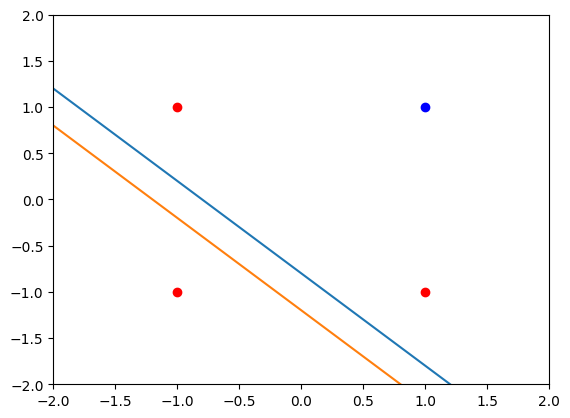

Bobot: [0.0, 0.0, 2.0]


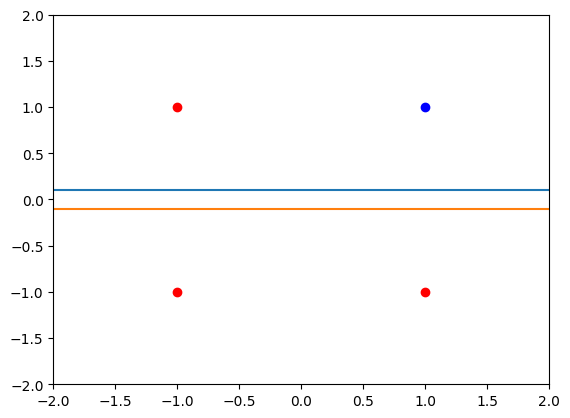

Bobot: [-1.0, 1.0, 1.0]


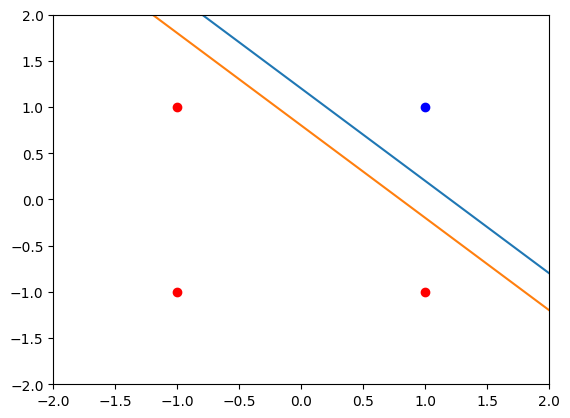

Bobot: [-1.0, 1.0, 1.0]


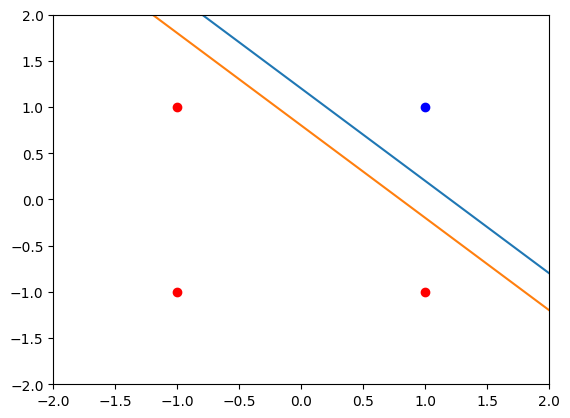


Epoch 2
Bobot: [-1.0, 1.0, 1.0]


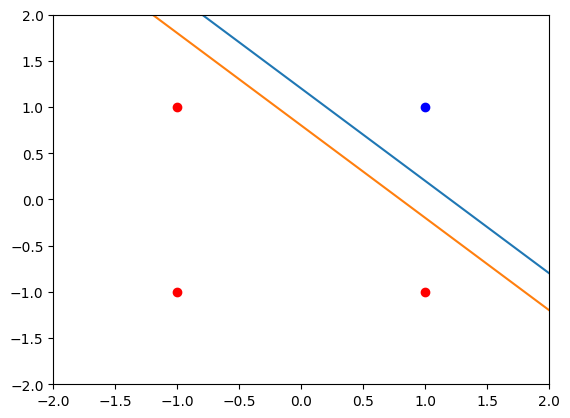

Bobot: [-1.0, 1.0, 1.0]


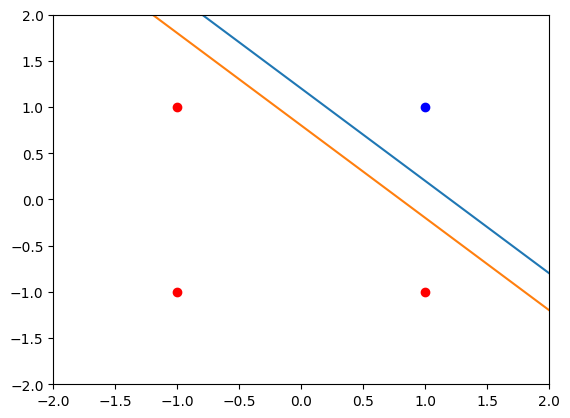

Bobot: [-1.0, 1.0, 1.0]


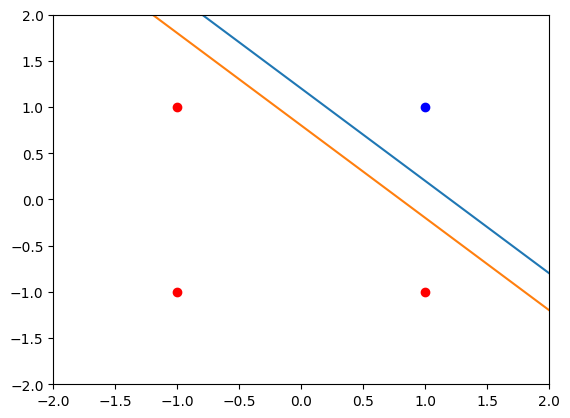

Bobot: [-1.0, 1.0, 1.0]


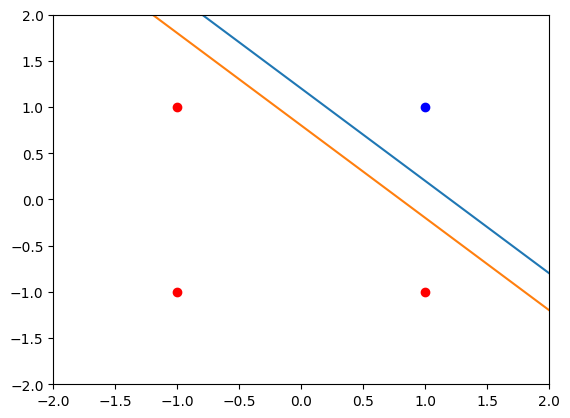

Epochs: 2
Output: [1, -1, -1, -1]
Target: (1, -1, -1, -1)
Accuracy: 1.0


In [31]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, -1, -1, -1
th = .2
model, epoch = percep_fit(train, target, th, verbose=True,
draw=True)
output = percep_predict(train, model)
accuracy = calc_accuracy(output, target)
print('Epochs:', epoch)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

### f) Logika OR

Tulis kode ke dalam *cell* di bawah ini:


Epoch 1
Bobot: [1.0, 1.0, 1.0]


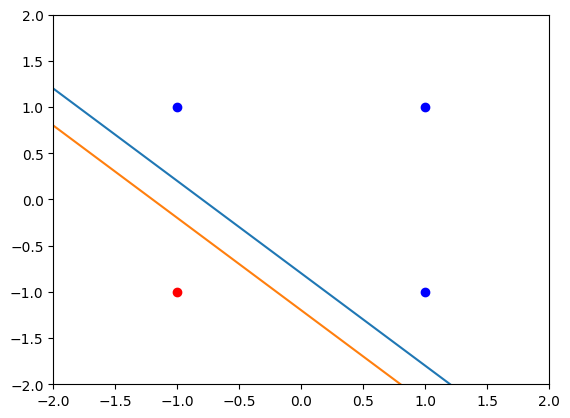

Bobot: [1.0, 1.0, 1.0]


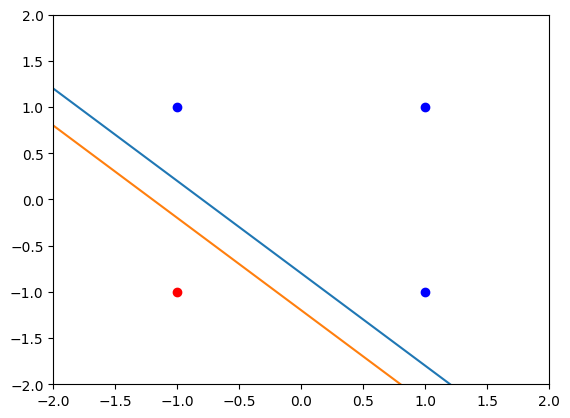

Bobot: [1.0, 1.0, 1.0]


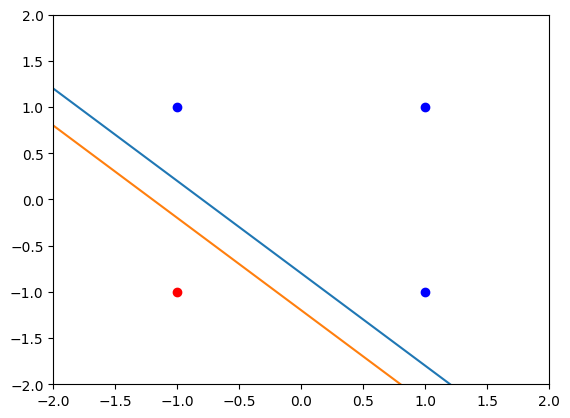

Bobot: [1.0, 1.0, 1.0]


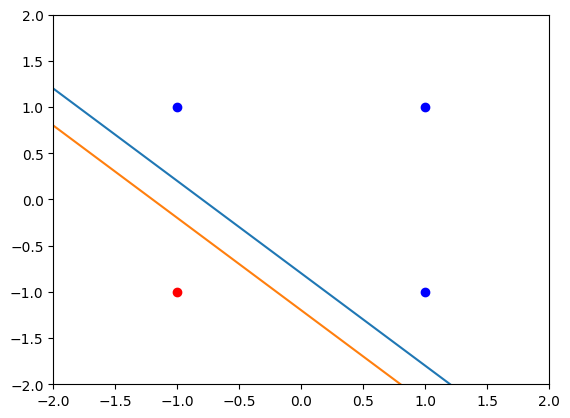


Epoch 2
Bobot: [1.0, 1.0, 1.0]


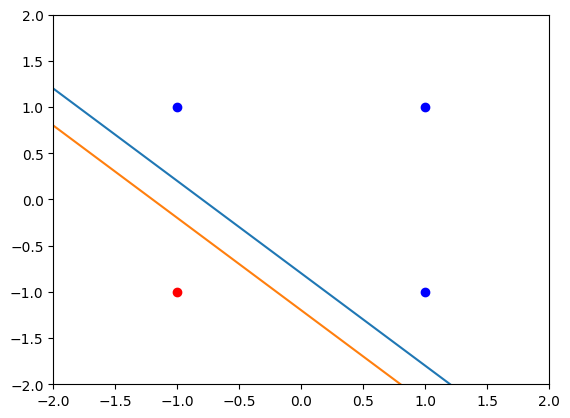

Bobot: [1.0, 1.0, 1.0]


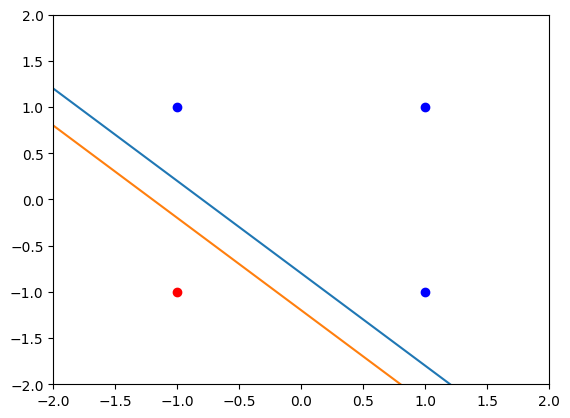

Bobot: [1.0, 1.0, 1.0]


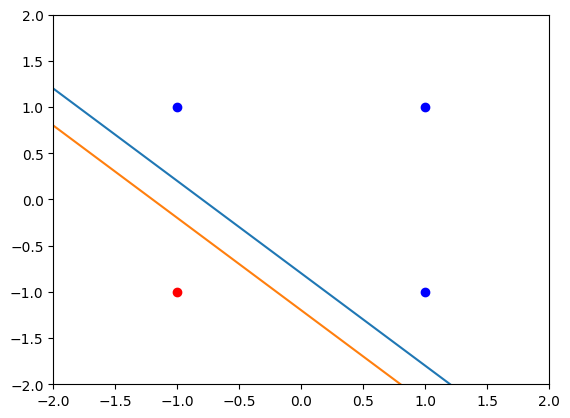

Bobot: [1.0, 1.0, 1.0]


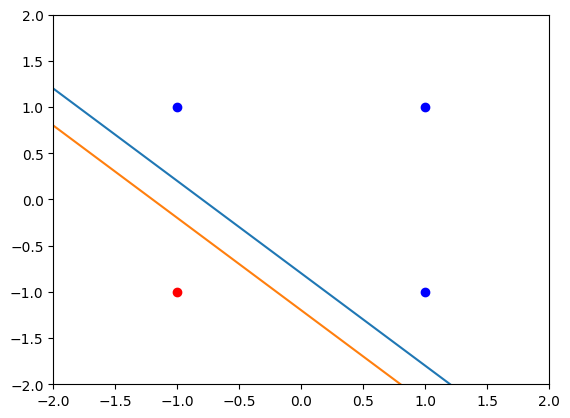

Epochs: 2
Output: [1, 1, 1, -1]
Target: (1, 1, 1, -1)
Accuracy: 1.0


In [32]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, 1, 1, -1
th = .2
model, epoch = percep_fit(train, target, th, verbose=True,
draw=True)
output = percep_predict(train, model)
accuracy = calc_accuracy(output, target)
print('Epochs:', epoch)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

### g) Logika AND NOT

Tulis kode ke dalam *cell* di bawah ini:


Epoch 1
Bobot: [-1.0, -1.0, -1.0]


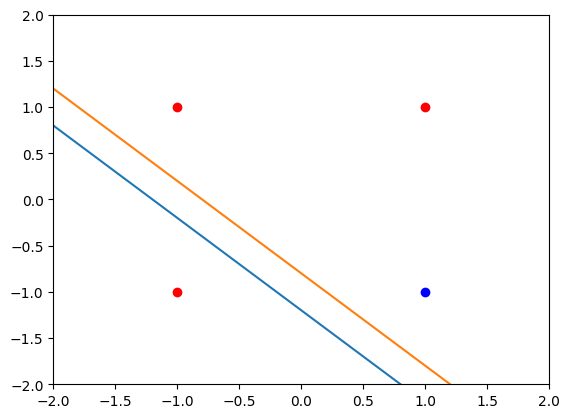

Bobot: [0.0, 0.0, -2.0]


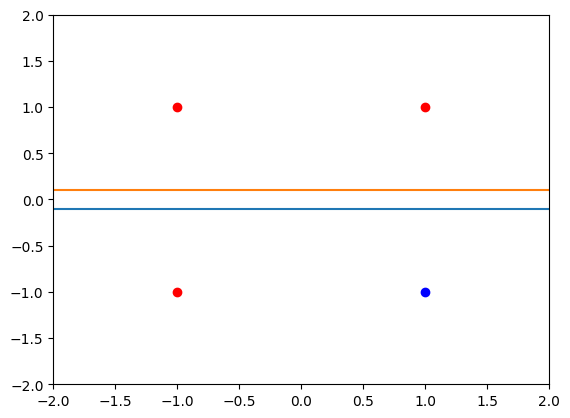

Bobot: [0.0, 0.0, -2.0]


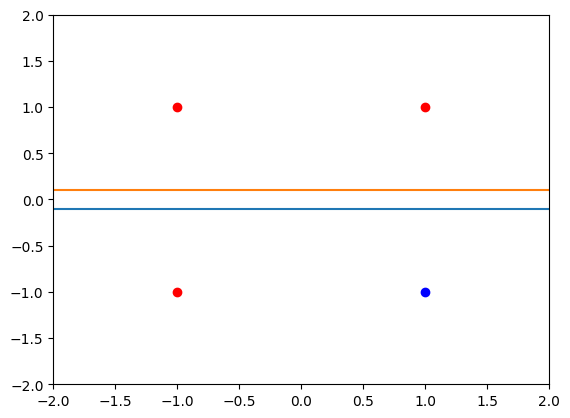

Bobot: [-1.0, 1.0, -1.0]


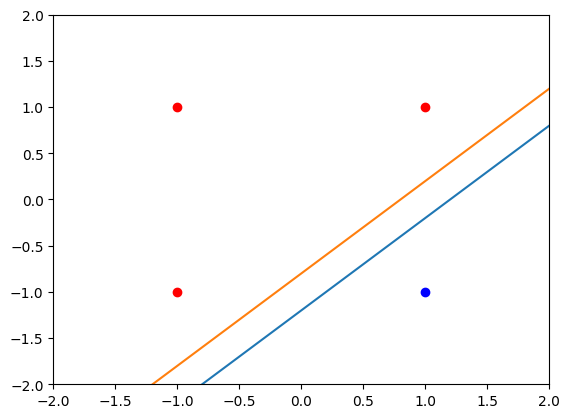


Epoch 2
Bobot: [-1.0, 1.0, -1.0]


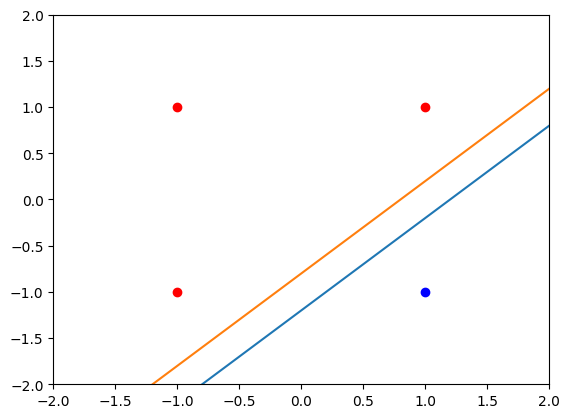

Bobot: [-1.0, 1.0, -1.0]


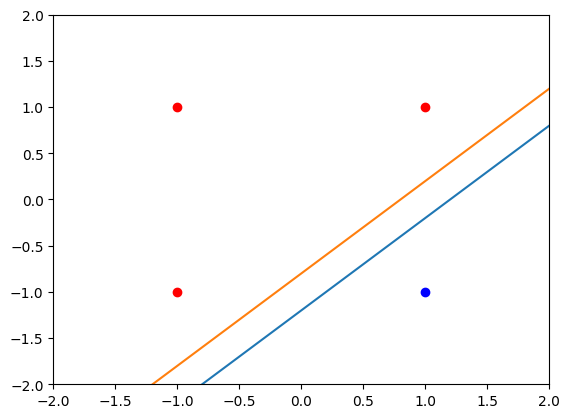

Bobot: [-1.0, 1.0, -1.0]


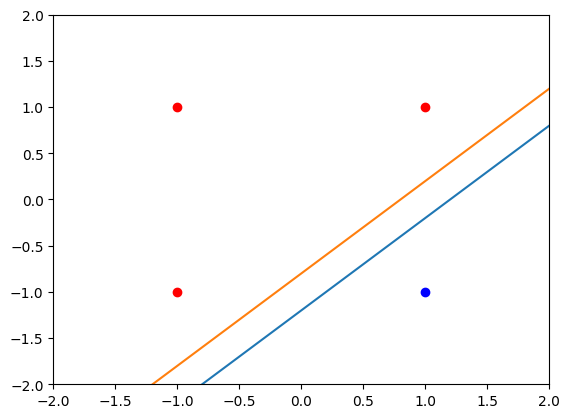

Bobot: [-1.0, 1.0, -1.0]


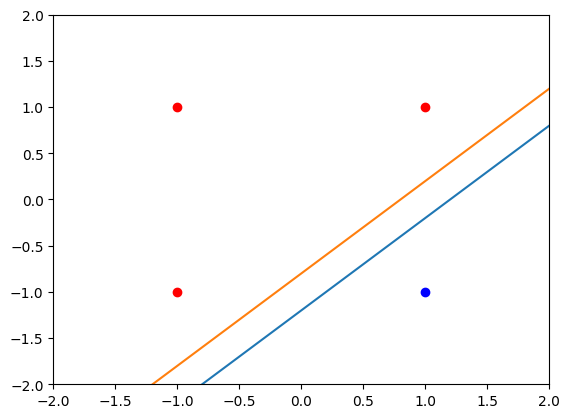

Epochs: 2
Output: [-1, 1, -1, -1]
Target: (-1, 1, -1, -1)
Accuracy: 1.0


In [33]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, -1, -1

th = .2
model, epoch = percep_fit(train, target, th, verbose=True,
draw=True)
output = percep_predict(train, model)
accuracy = calc_accuracy(output, target)
print('Epochs:', epoch)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

### h) Logika XOR

Tulis kode ke dalam *cell* di bawah ini:

In [34]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, 1, -1
th = .2
model, epoch = percep_fit(train, target, th, max_epoch=50,
verbose=True, draw=False)
output = percep_predict(train, model)
accuracy = calc_accuracy(output, target)
print('Output:', output)
print('Accuracy:', accuracy)


Epoch 1
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 2
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 3
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 4
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 5
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 6
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 7
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 8
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 9
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 10
Bobot: [-1.0, -1.0, -1.0]
B

## *Dataset* Iris

![Iris Dataset](https://www.spataru.at/images/blog/iris-dataset-svm/iris_types.jpg)

### i) *Load* dan *plot* data

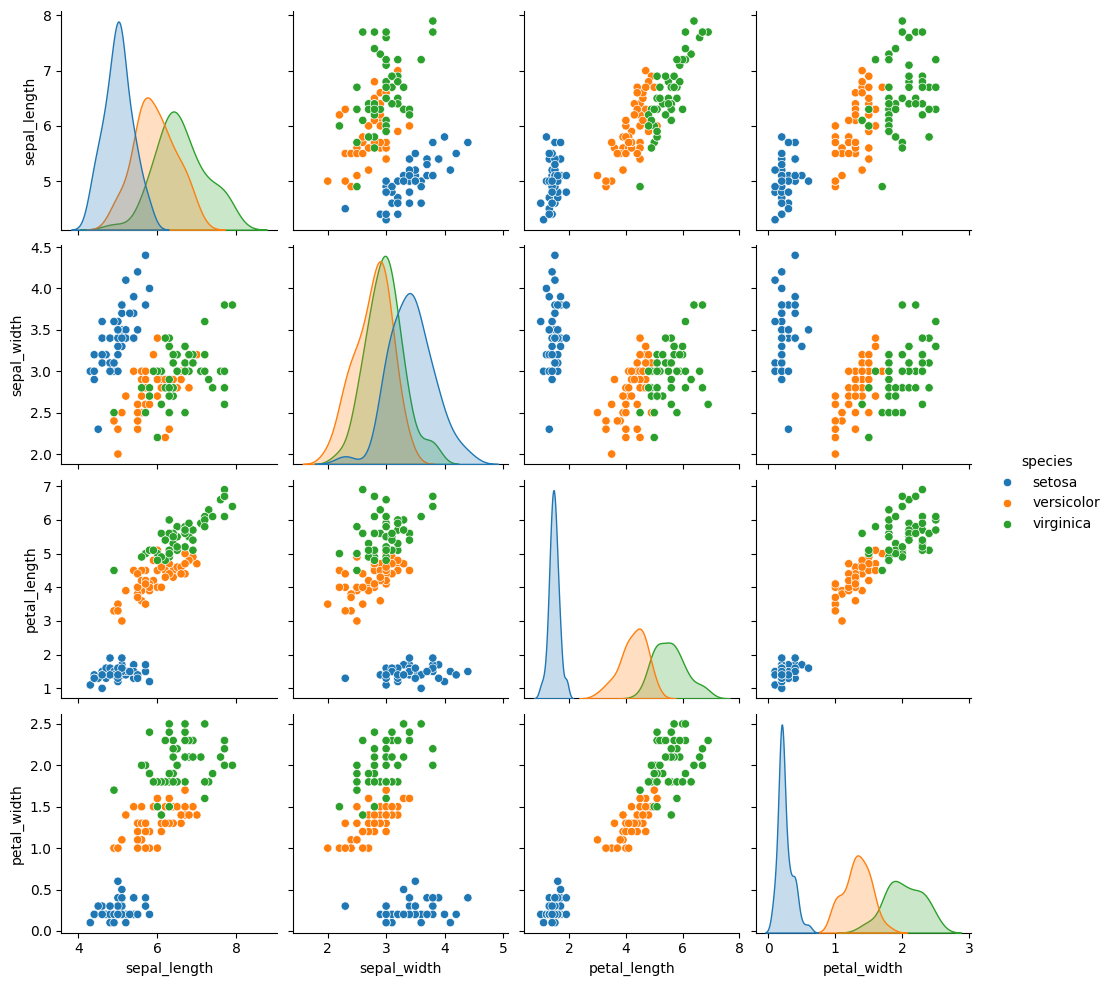

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

sns.pairplot(iris, hue='species')
plt.show()

### j) Menghapus Kelas Virginica

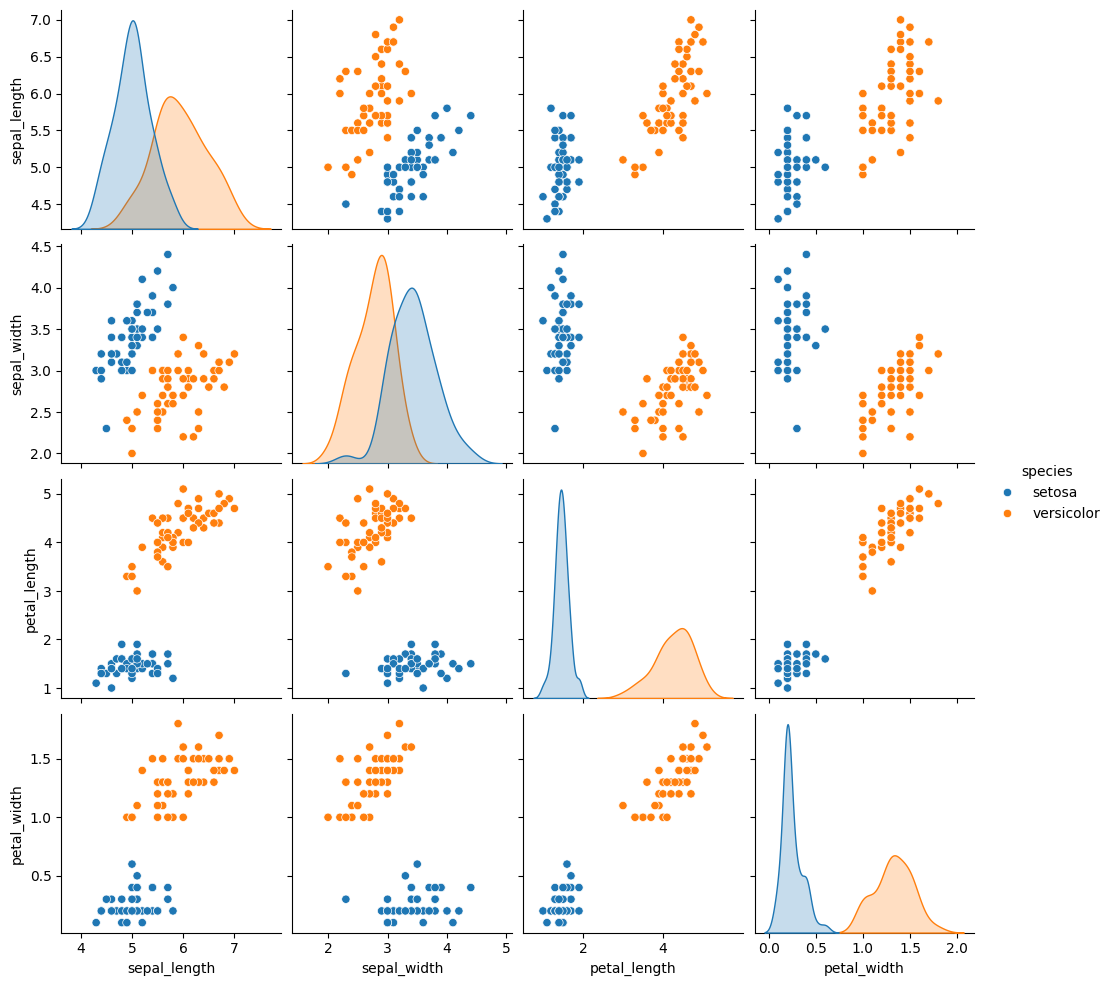

In [36]:
iris = iris.loc[iris['species'] != 'virginica']

sns.pairplot(iris, hue='species')
plt.show()

### k) Menghapus ciri `sepal_width` dan `petal_width`

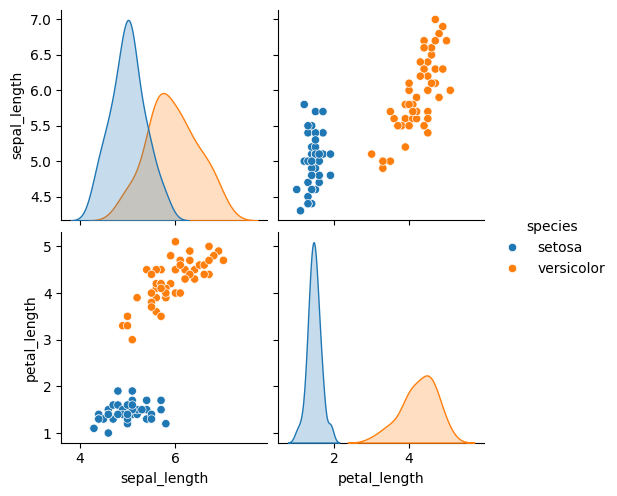

In [37]:
iris = iris.drop(['sepal_width', 'petal_width'], axis=1)

sns.pairplot(iris, hue='species')
plt.show()

### l) Proses *Training* dan *Testing*


Epoch 1
Bobot: [-1.0, -0.14814814814814836, -0.07317073170731711]


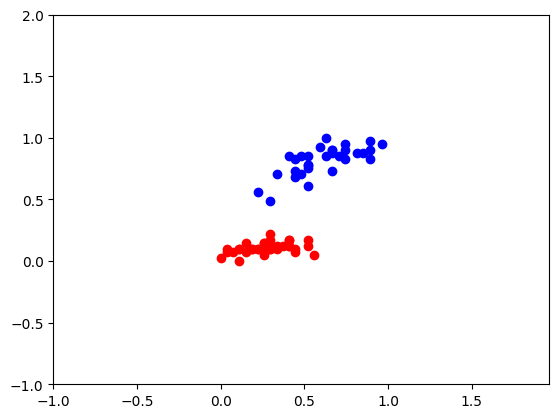

Bobot: [-1.0, -0.14814814814814836, -0.07317073170731711]


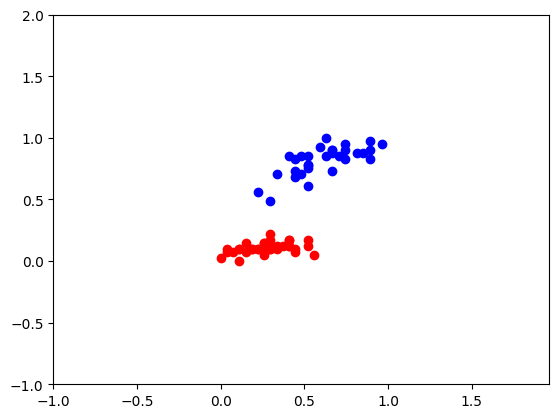

Bobot: [-1.0, -0.14814814814814836, -0.07317073170731711]


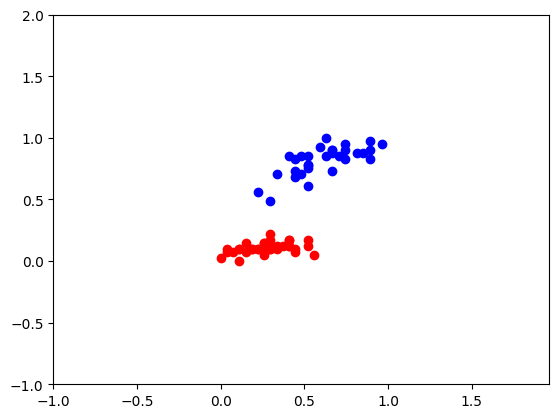

Bobot: [0.0, 0.5185185185185184, 0.6585365853658537]


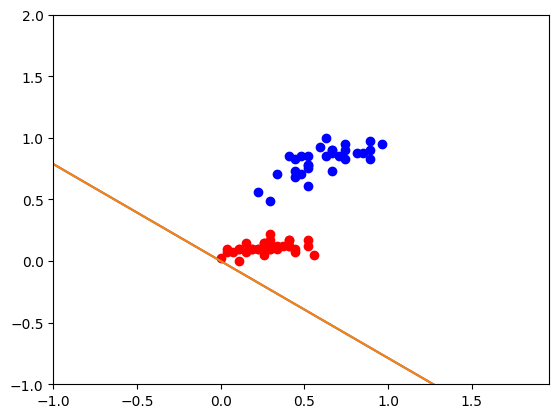

Bobot: [-1.0, 0.11111111111111072, 0.4878048780487805]


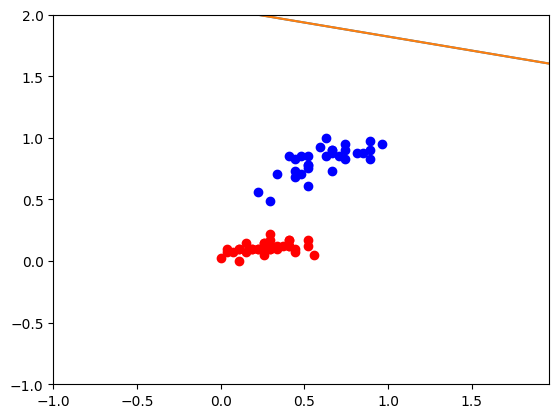

Bobot: [-1.0, 0.11111111111111072, 0.4878048780487805]


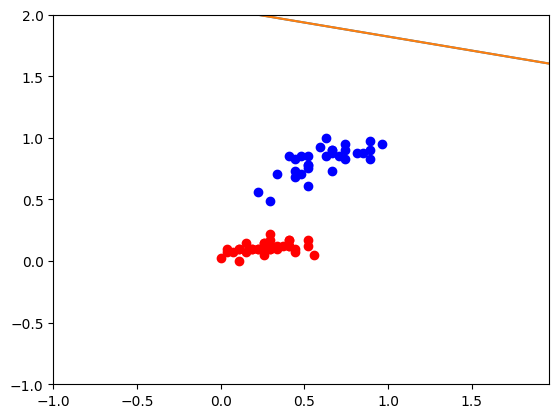

Bobot: [-1.0, 0.11111111111111072, 0.4878048780487805]


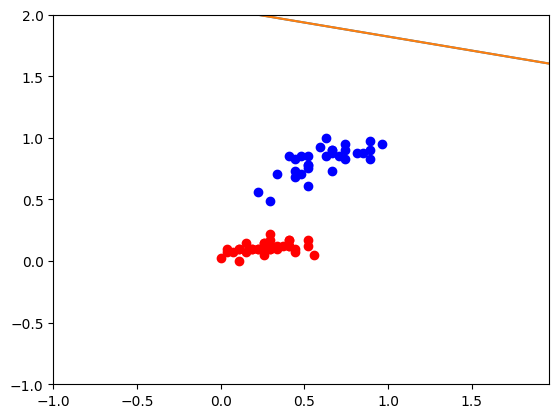

Bobot: [-1.0, 0.11111111111111072, 0.4878048780487805]


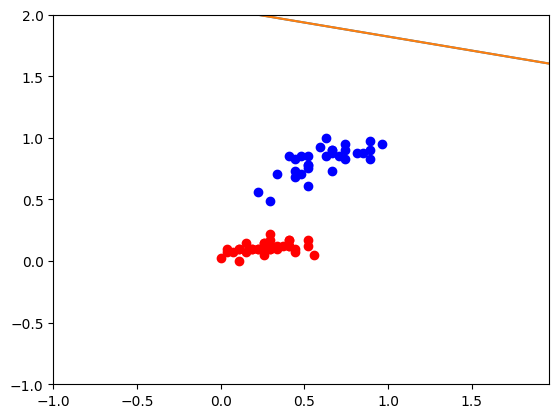

Bobot: [-1.0, 0.11111111111111072, 0.4878048780487805]


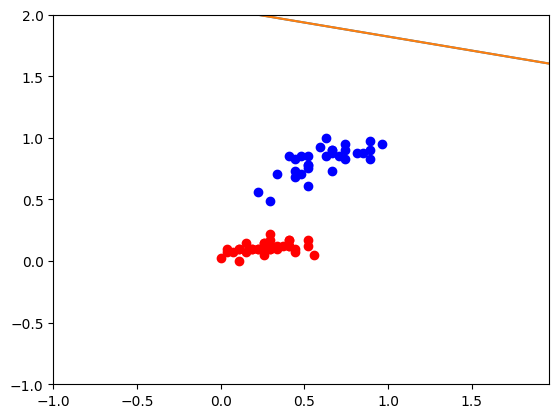

Bobot: [-1.0, 0.11111111111111072, 0.4878048780487805]


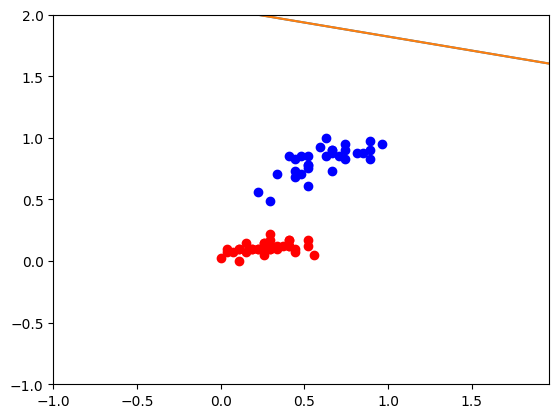

Bobot: [-1.0, 0.11111111111111072, 0.4878048780487805]


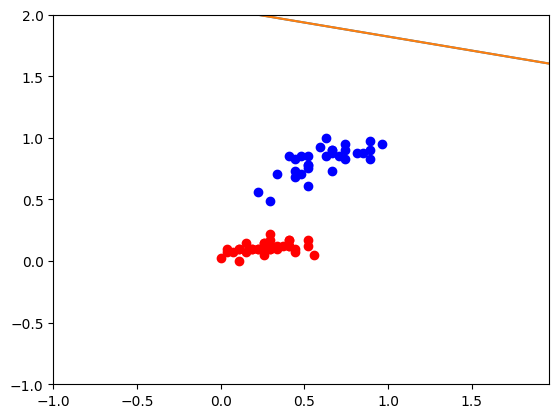

Bobot: [-1.0, 0.11111111111111072, 0.4878048780487805]


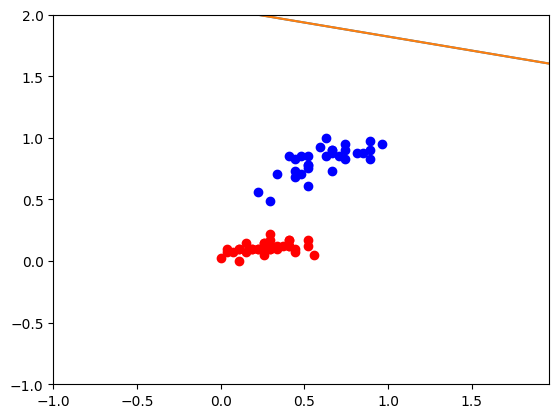

Bobot: [-1.0, 0.11111111111111072, 0.4878048780487805]


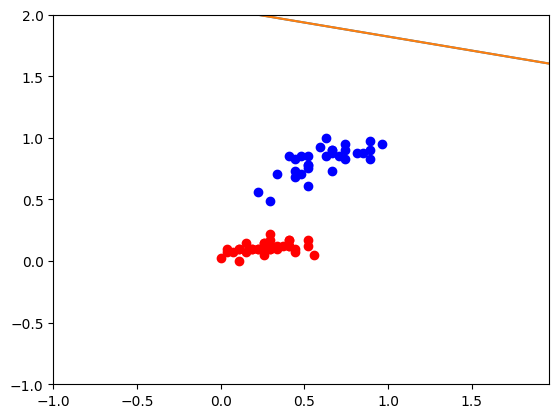

Bobot: [-1.0, 0.11111111111111072, 0.4878048780487805]


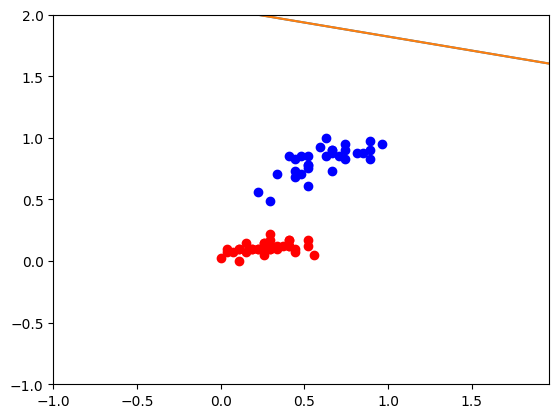

Bobot: [0.0, 0.7407407407407407, 1.4878048780487805]


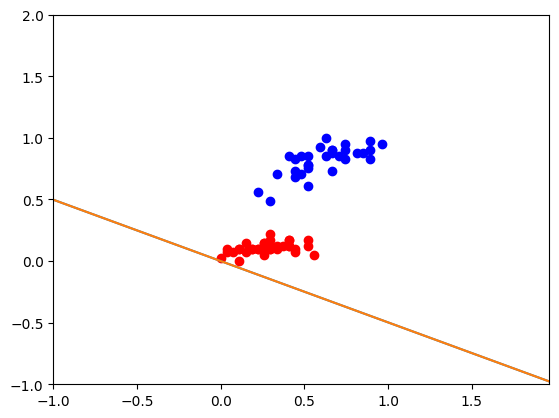

Bobot: [0.0, 0.7407407407407407, 1.4878048780487805]


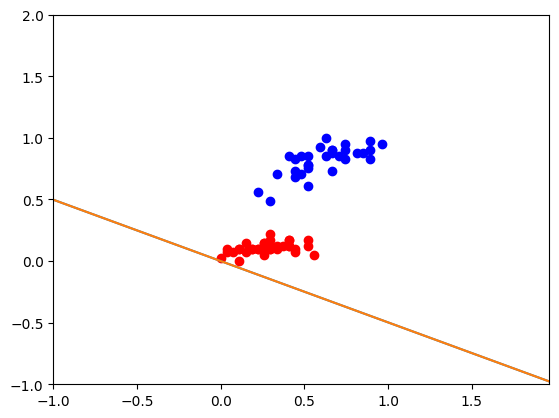

Bobot: [-1.0, 0.4444444444444444, 1.3902439024390243]


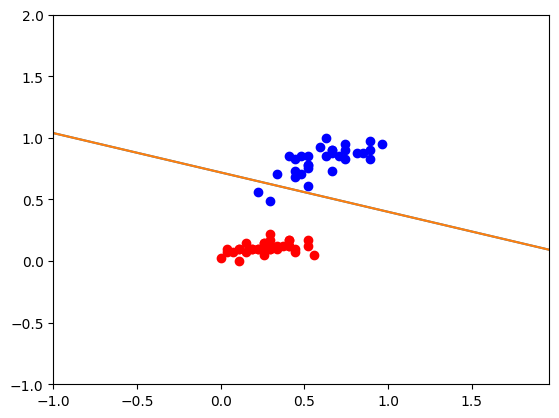

Bobot: [-1.0, 0.4444444444444444, 1.3902439024390243]


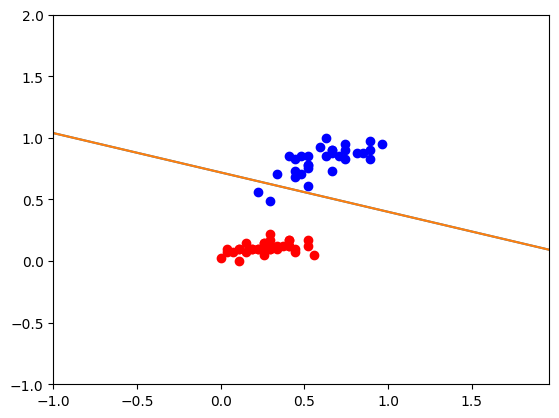

Bobot: [-1.0, 0.4444444444444444, 1.3902439024390243]


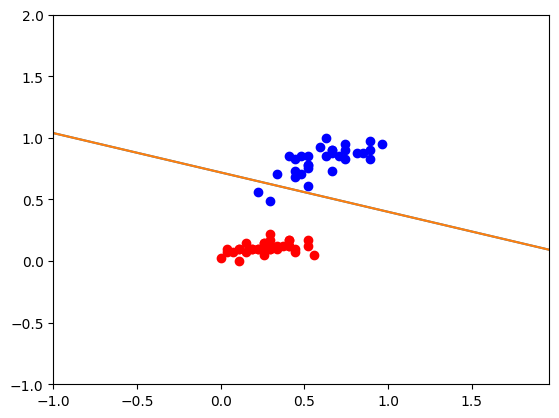

Bobot: [-1.0, 0.4444444444444444, 1.3902439024390243]


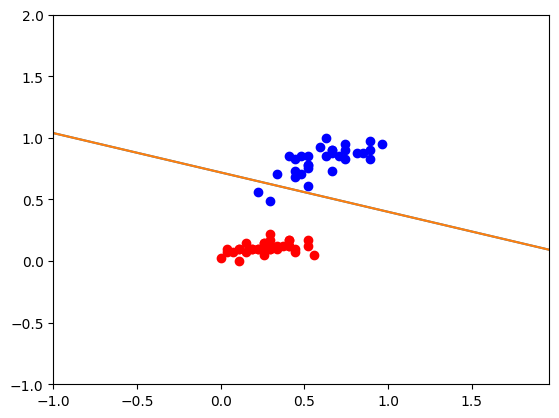

Bobot: [-1.0, 0.4444444444444444, 1.3902439024390243]


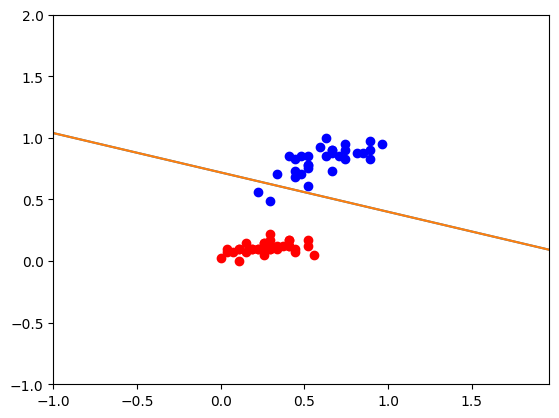

Bobot: [-1.0, 0.4444444444444444, 1.3902439024390243]


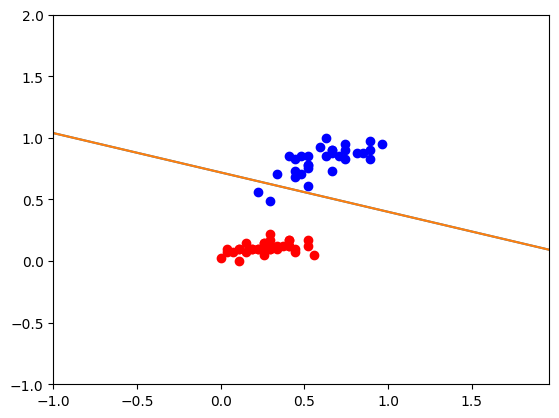

Bobot: [-1.0, 0.4444444444444444, 1.3902439024390243]


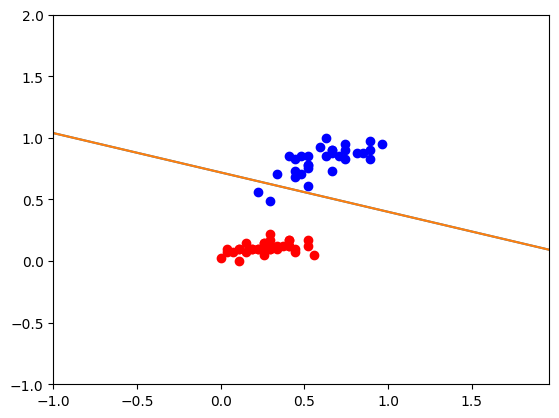

Bobot: [-1.0, 0.4444444444444444, 1.3902439024390243]


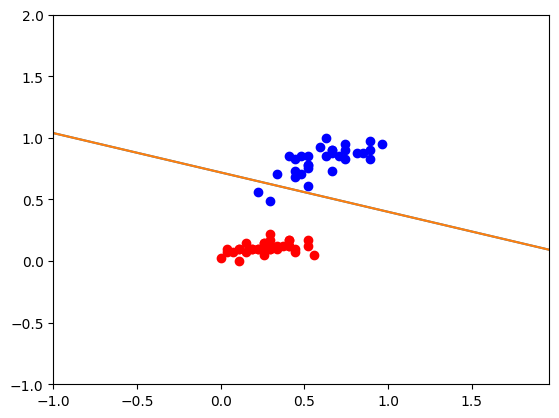

Bobot: [-1.0, 0.4444444444444444, 1.3902439024390243]


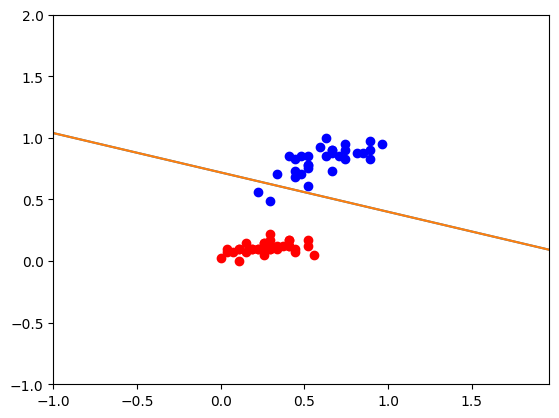

Bobot: [-1.0, 0.4444444444444444, 1.3902439024390243]


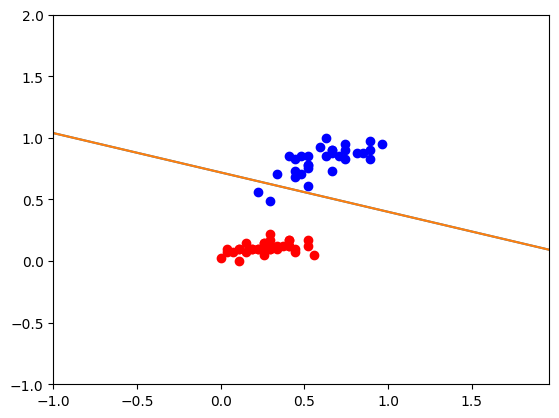

Bobot: [-1.0, 0.4444444444444444, 1.3902439024390243]


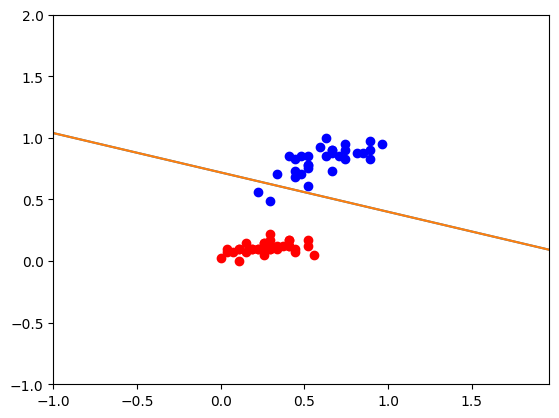

Bobot: [-1.0, 0.4444444444444444, 1.3902439024390243]


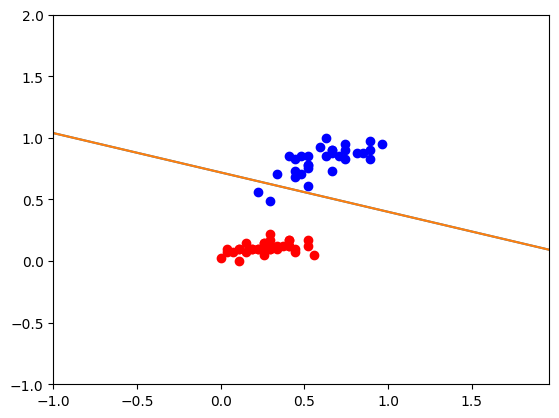

Bobot: [0.0, 0.7407407407407407, 1.8780487804878048]


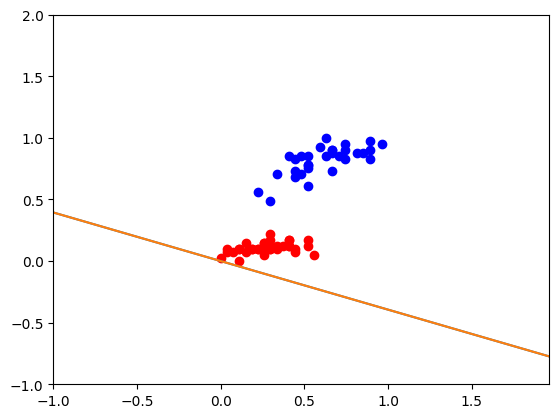

Bobot: [0.0, 0.7407407407407407, 1.8780487804878048]


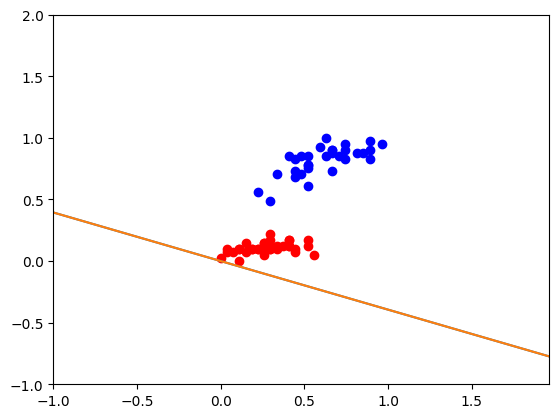

Bobot: [0.0, 0.7407407407407407, 1.8780487804878048]


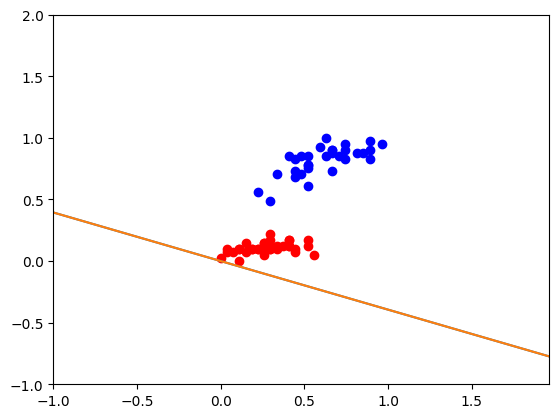

Bobot: [0.0, 0.7407407407407407, 1.8780487804878048]


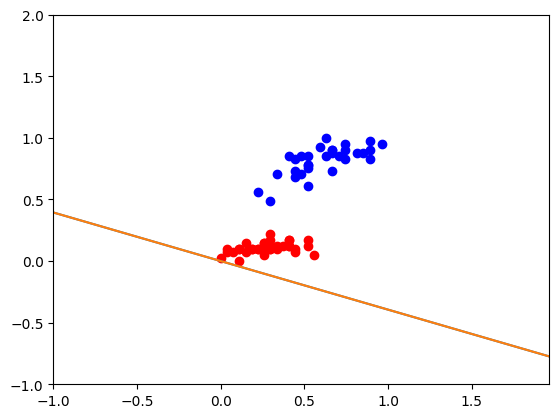

Bobot: [0.0, 0.7407407407407407, 1.8780487804878048]


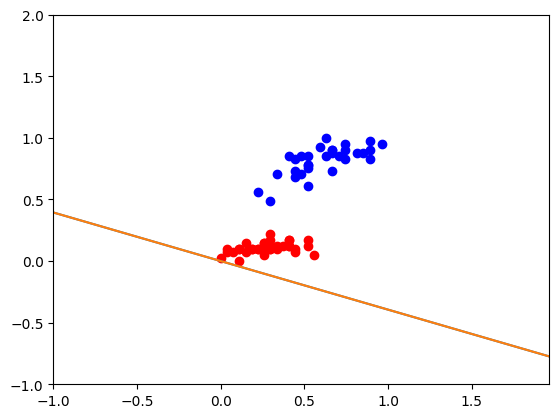

Bobot: [0.0, 0.7407407407407407, 1.8780487804878048]


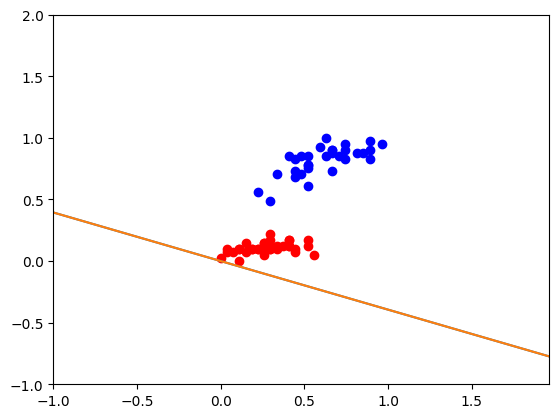

Bobot: [0.0, 0.7407407407407407, 1.8780487804878048]


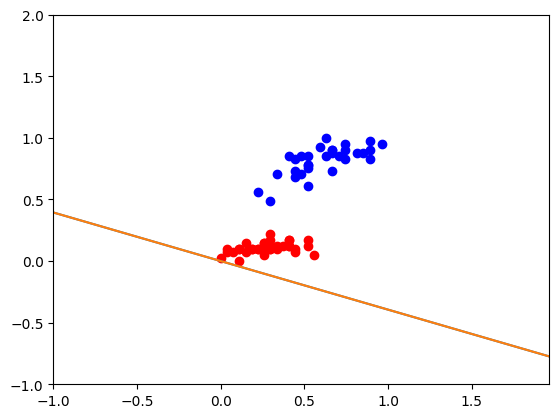

Bobot: [0.0, 0.7407407407407407, 1.8780487804878048]


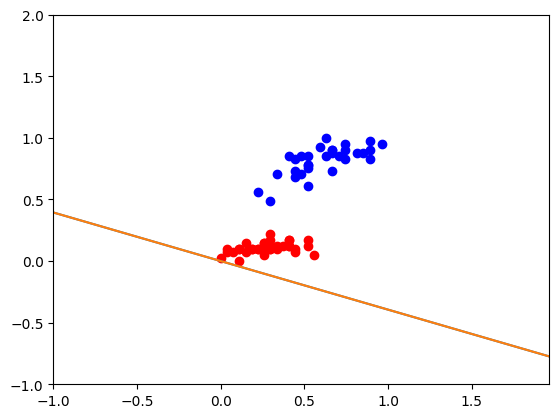

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


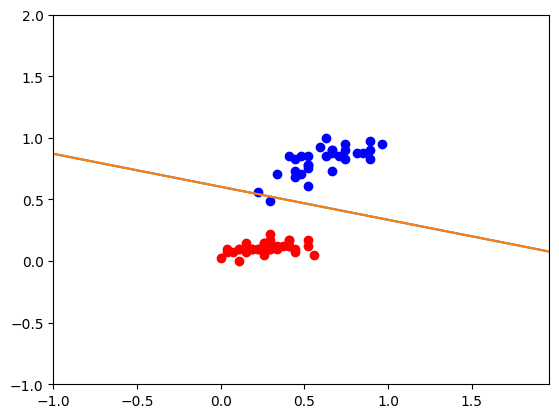

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


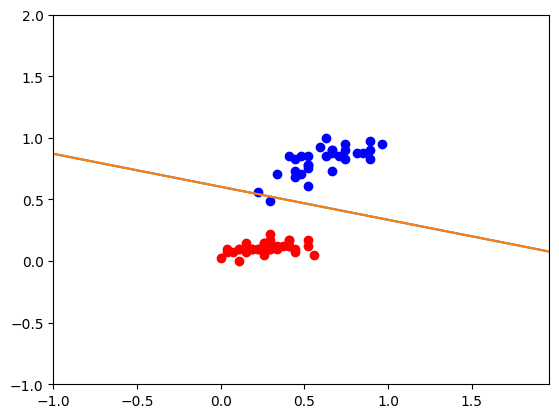

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


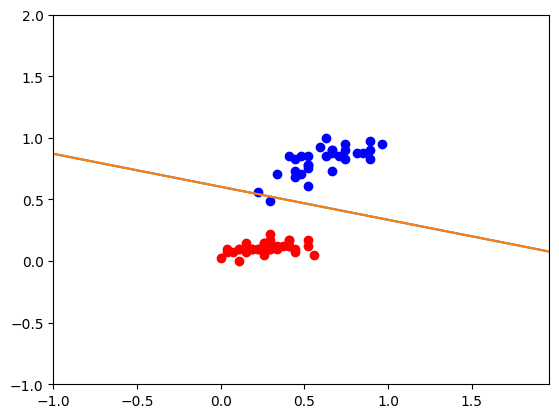

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


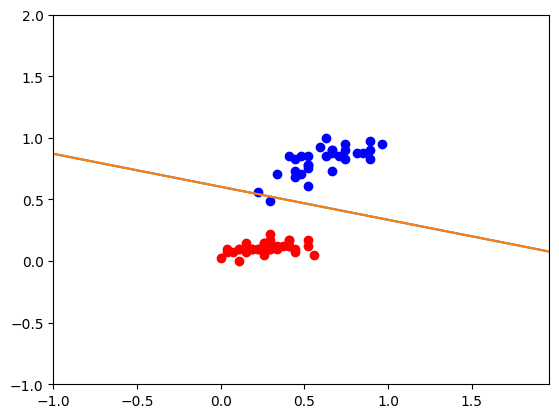

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


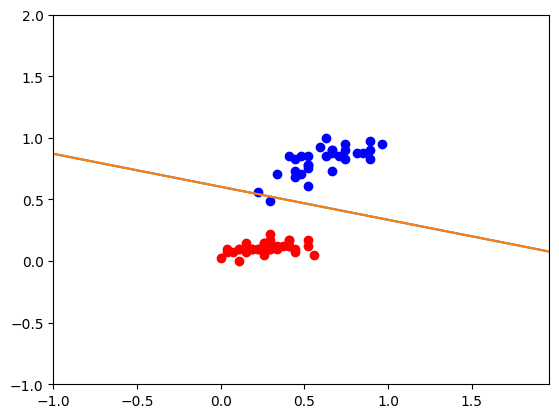

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


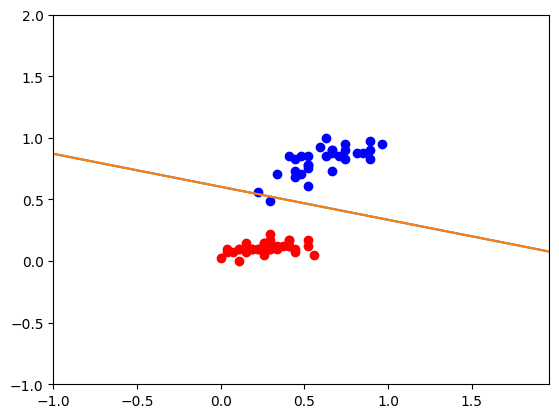

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


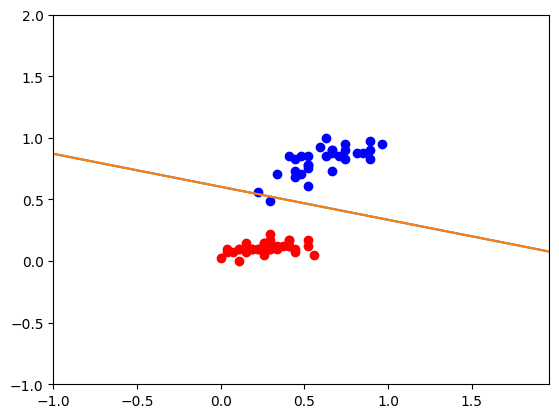

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


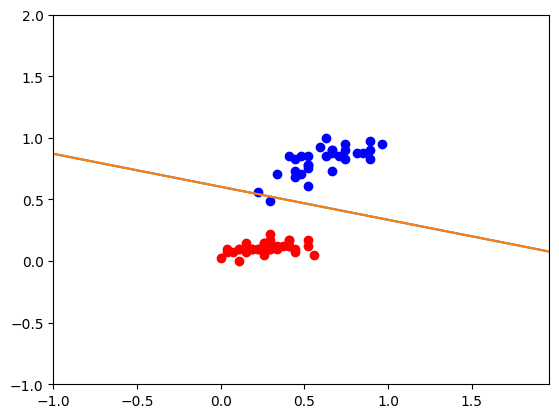

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


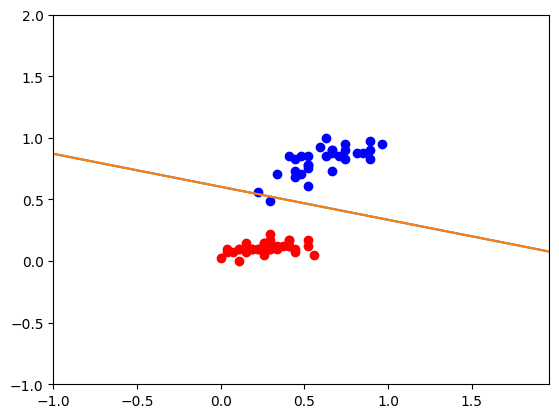

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


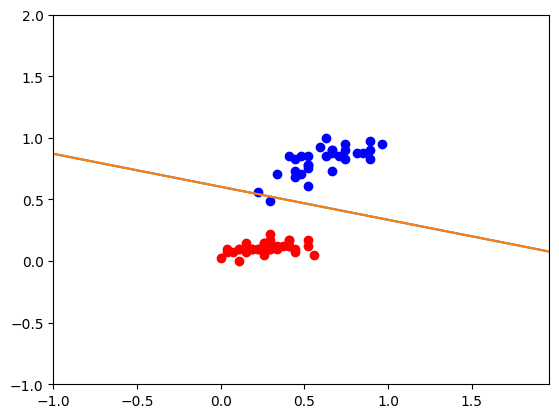

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


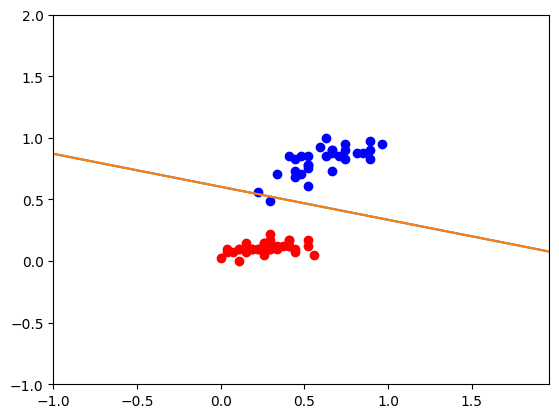

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


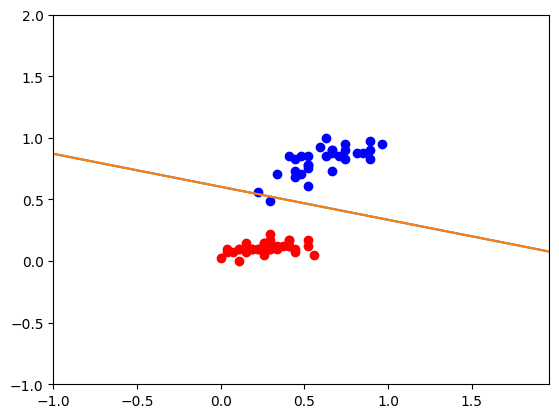

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


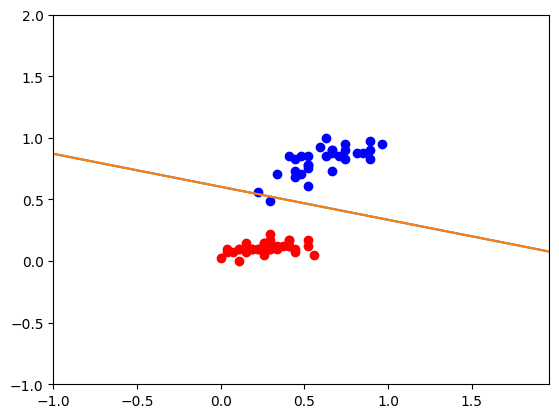

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


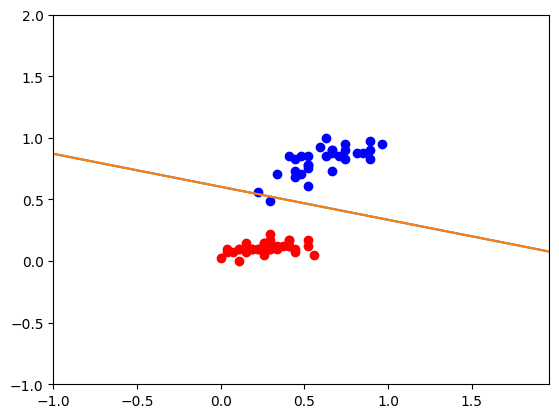

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


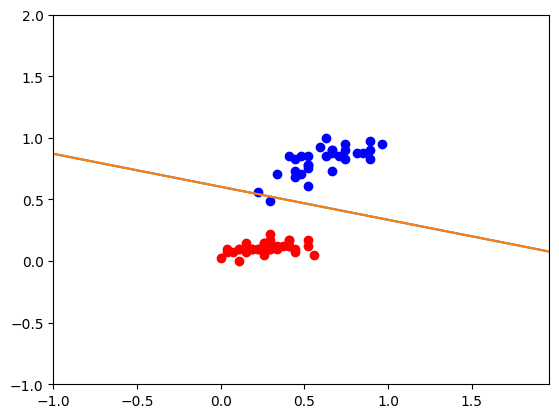

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


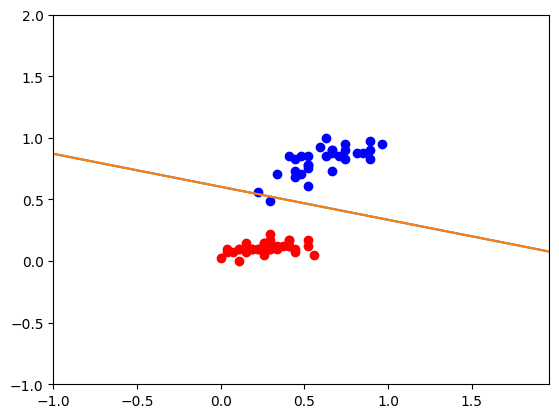

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


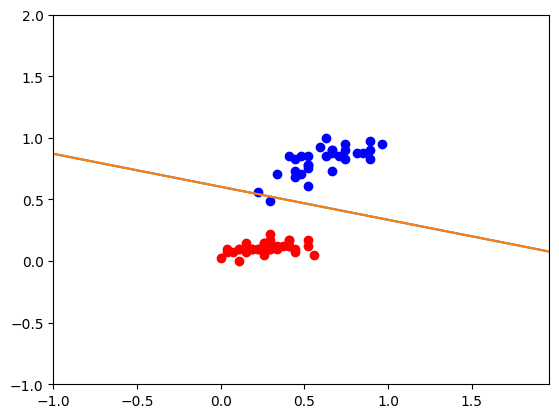

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


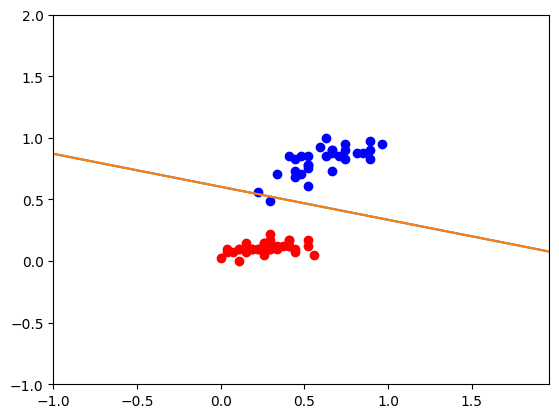

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


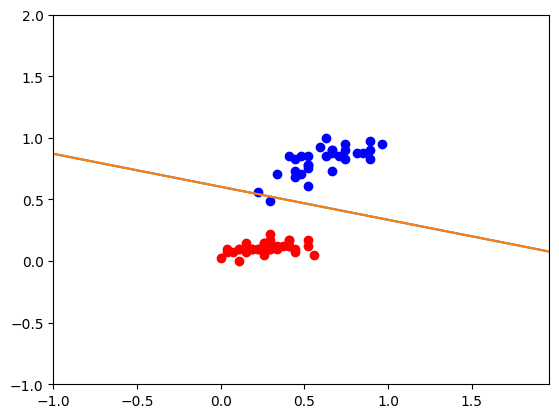

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


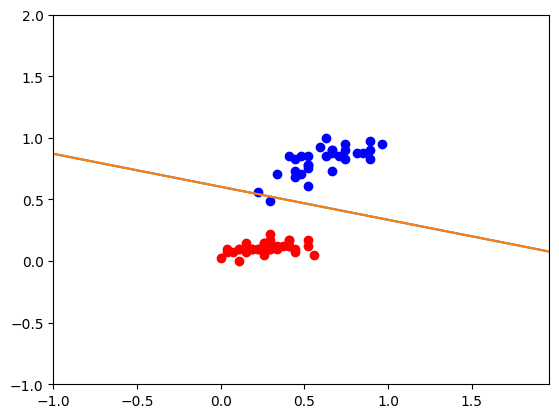

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


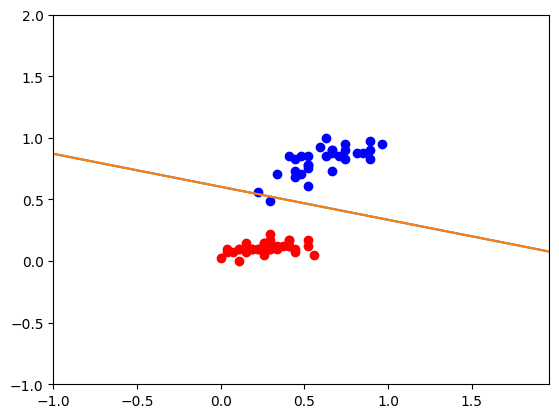

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


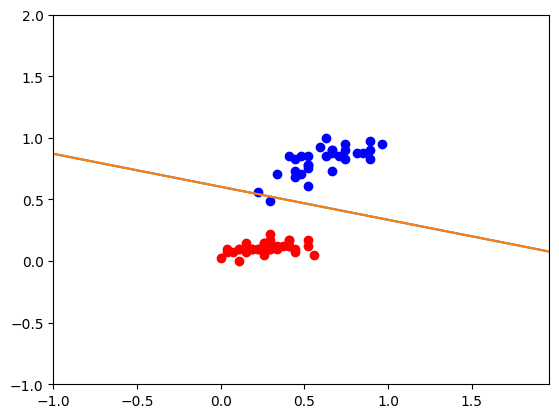

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


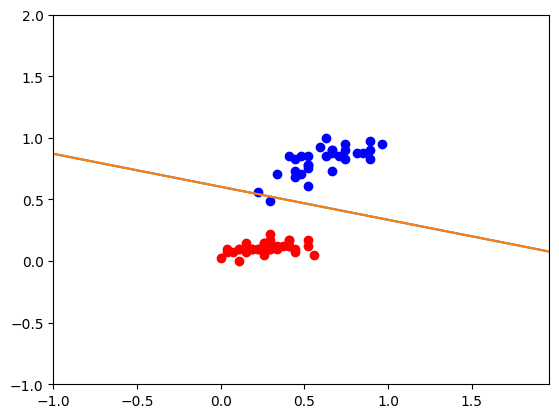

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


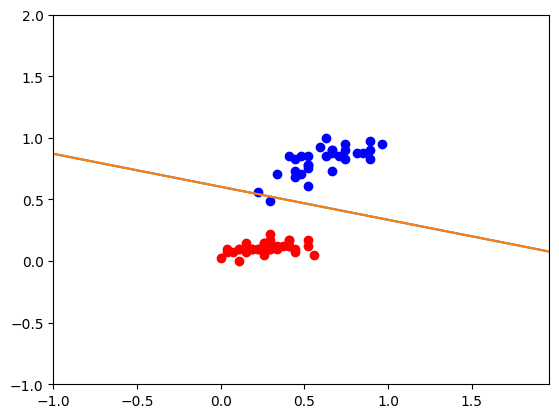

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


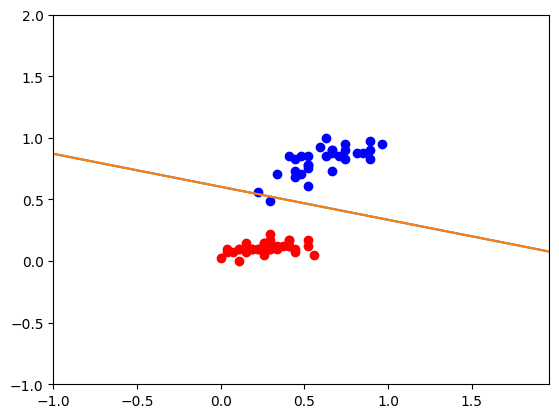

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


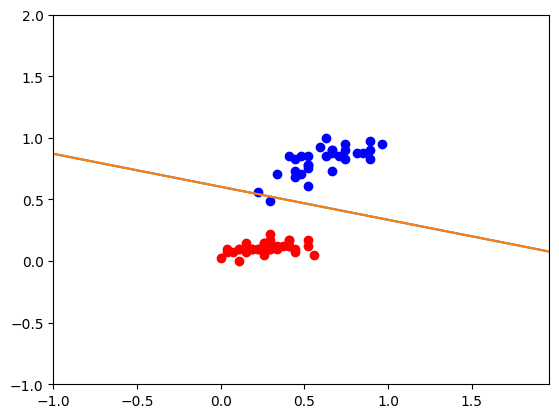

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


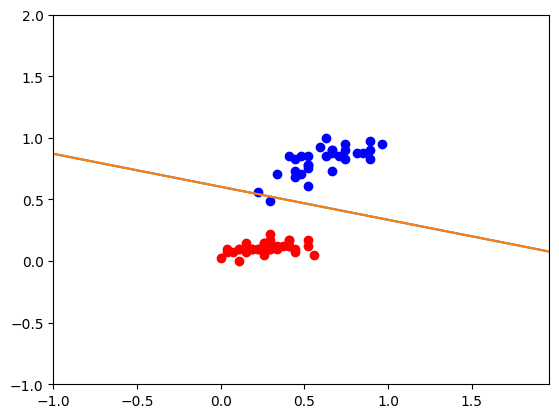

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


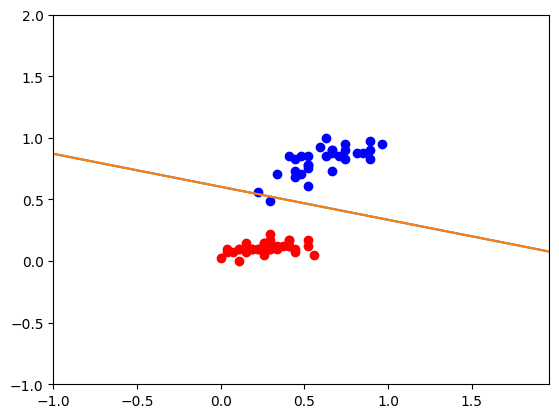

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


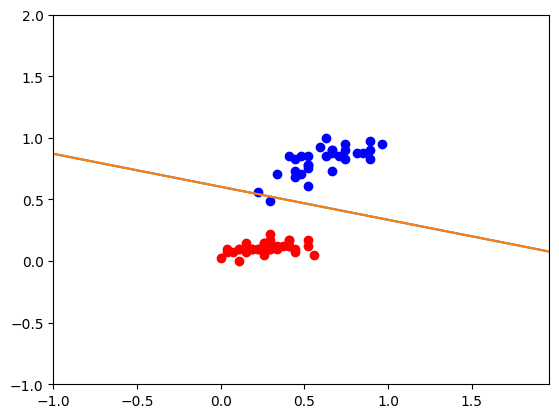

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


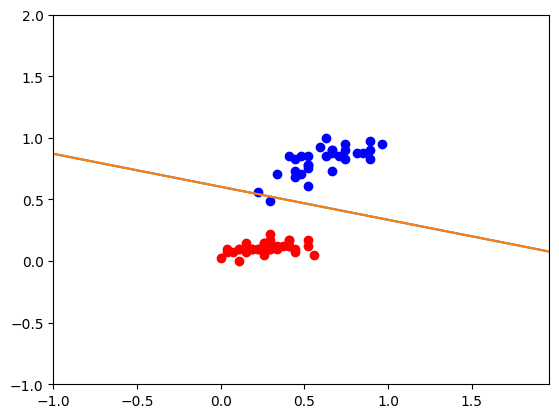

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


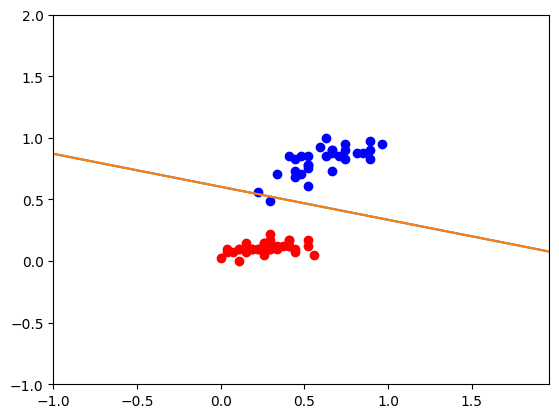

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


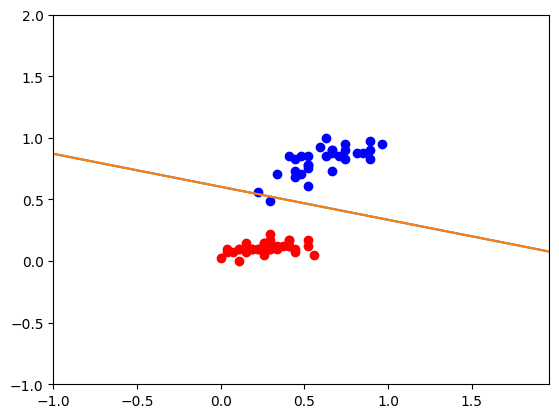

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


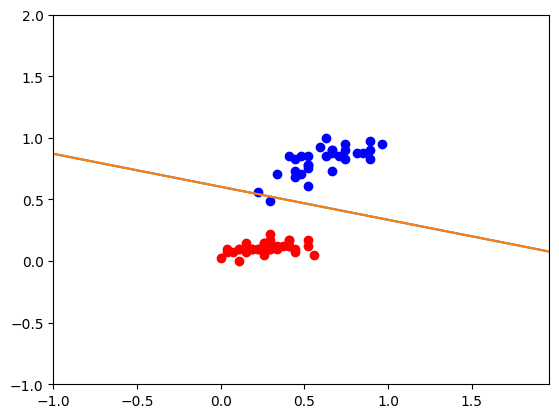

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


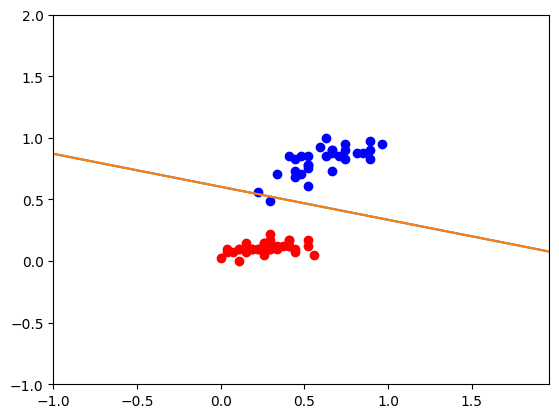


Epoch 2
Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


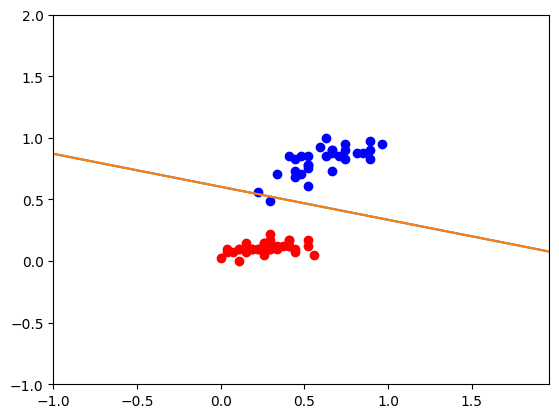

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


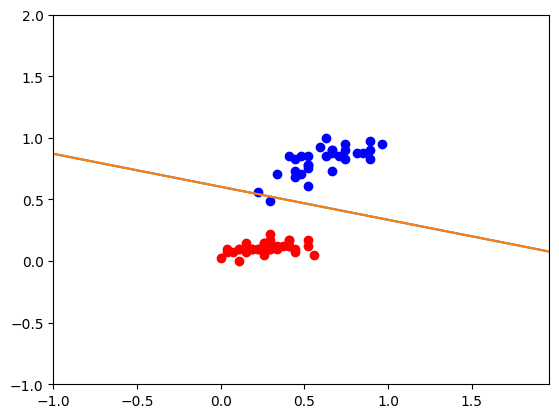

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


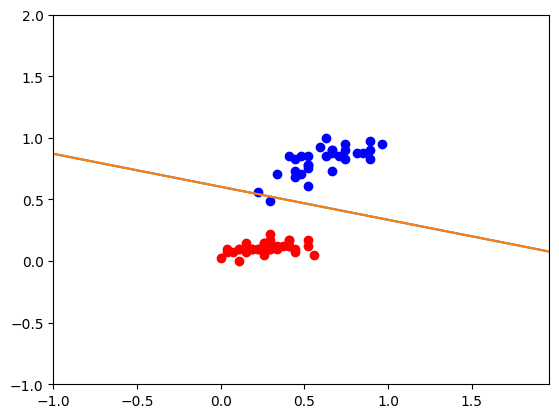

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


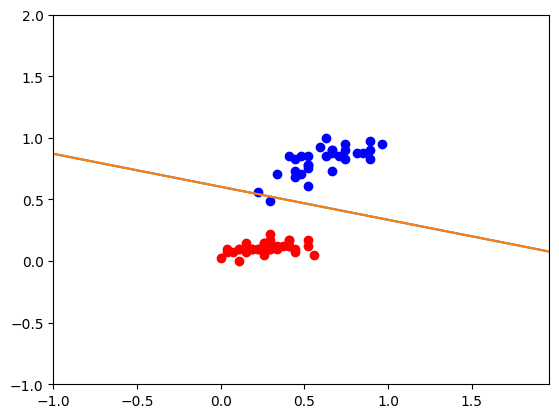

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


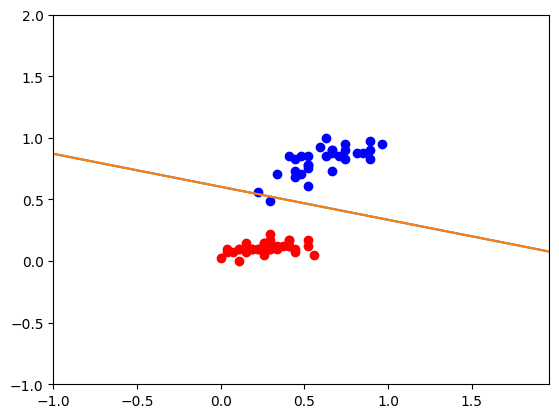

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


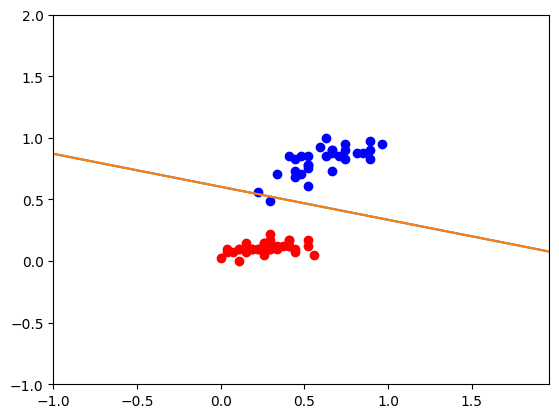

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


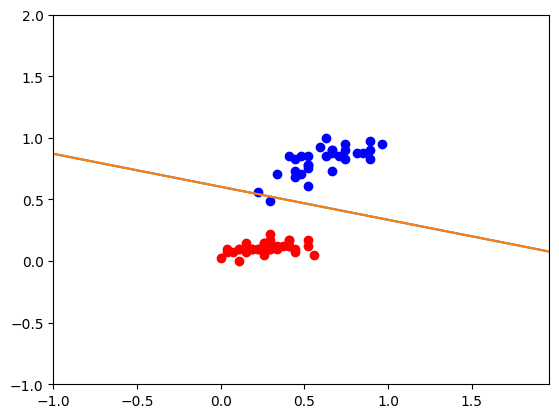

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


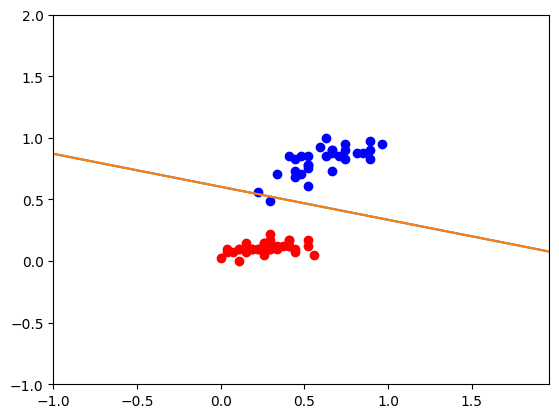

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


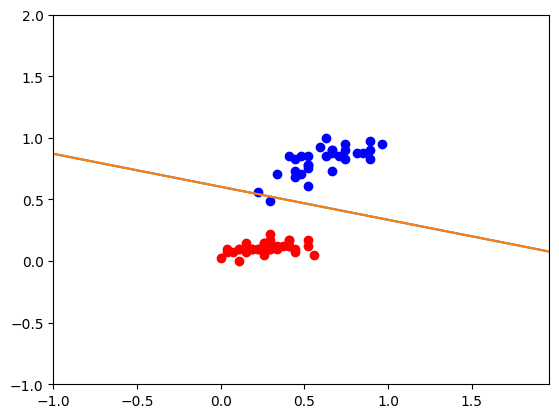

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


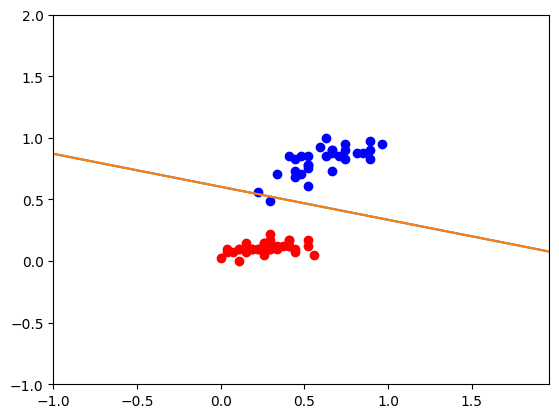

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


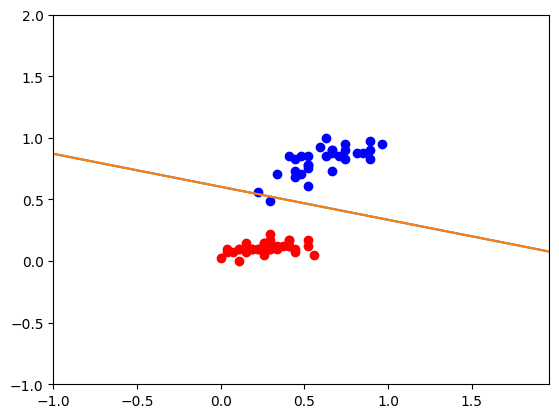

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


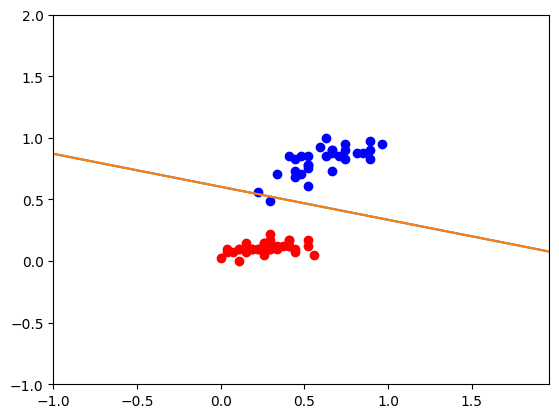

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


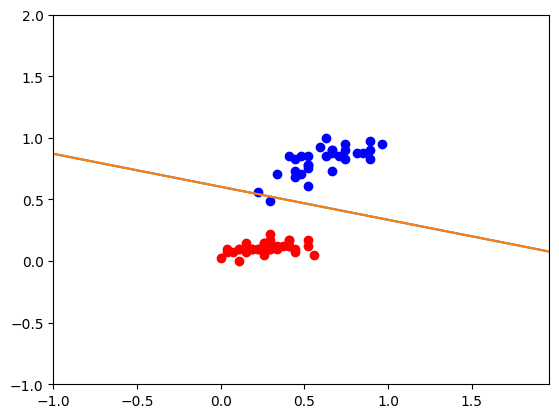

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


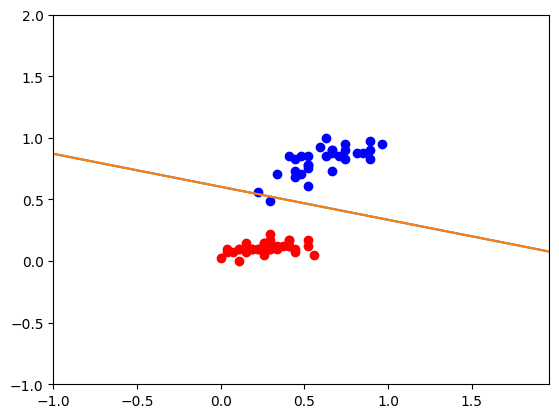

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


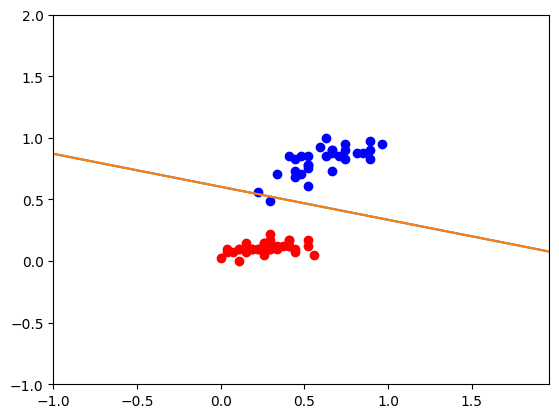

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


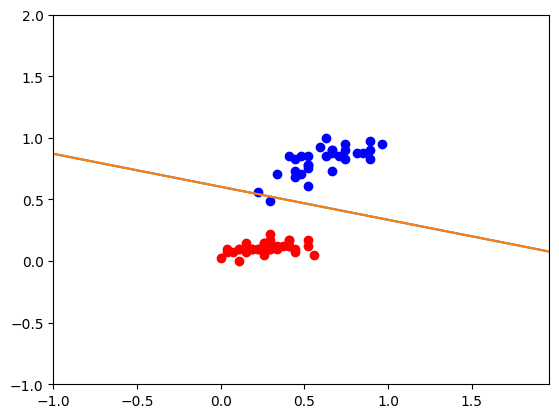

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


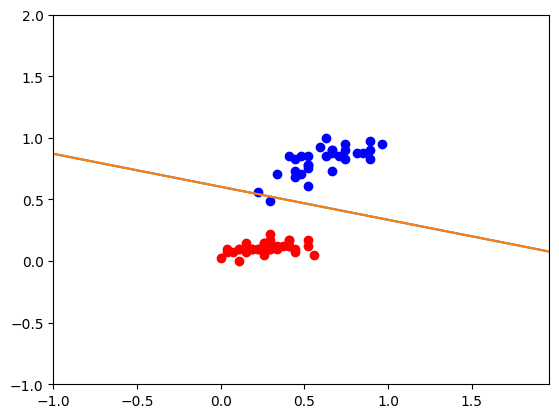

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


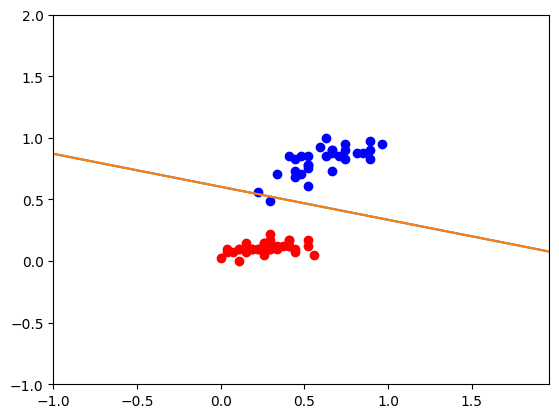

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


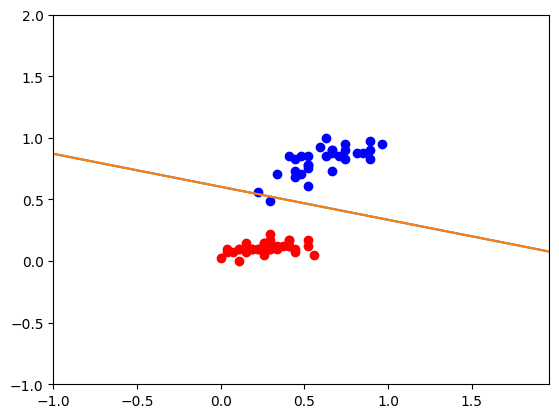

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


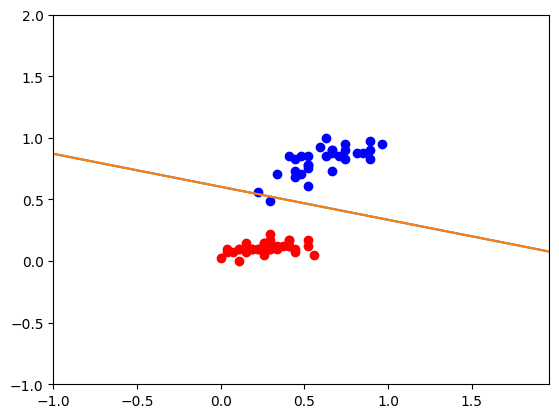

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


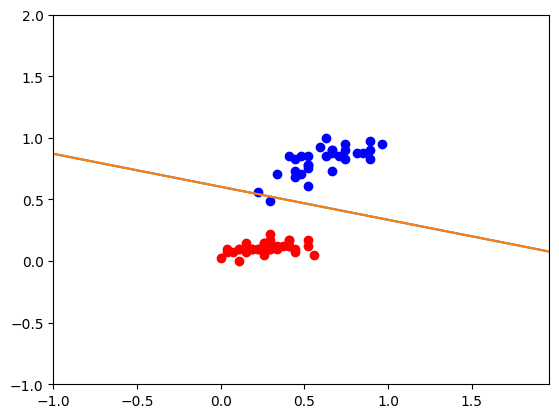

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


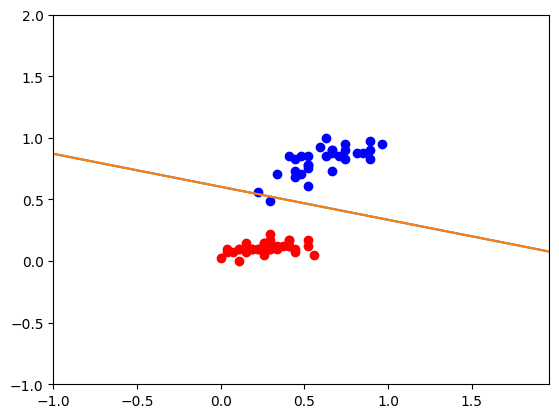

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


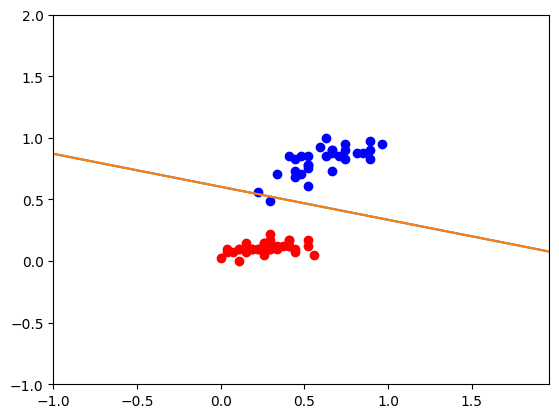

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


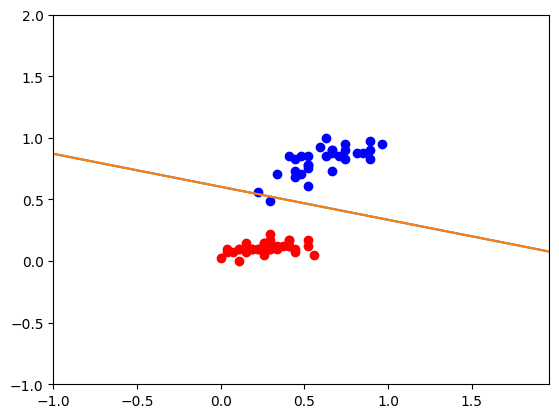

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


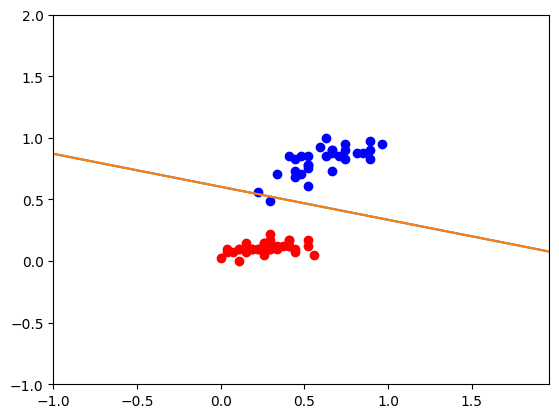

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


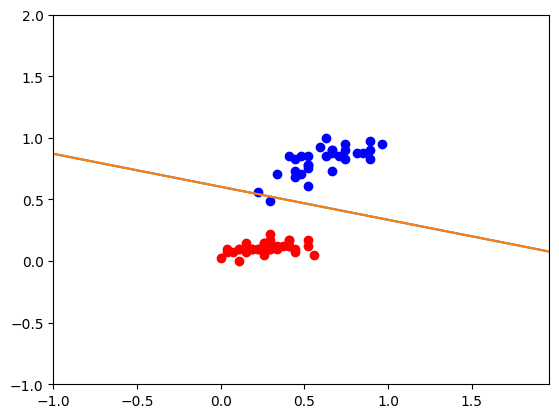

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


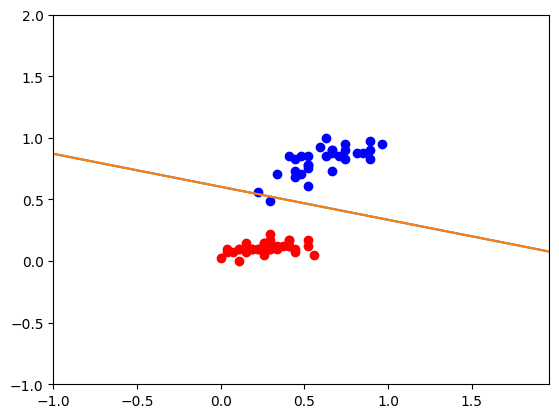

Bobot: [-1.0, 0.4444444444444444, 1.6585365853658536]


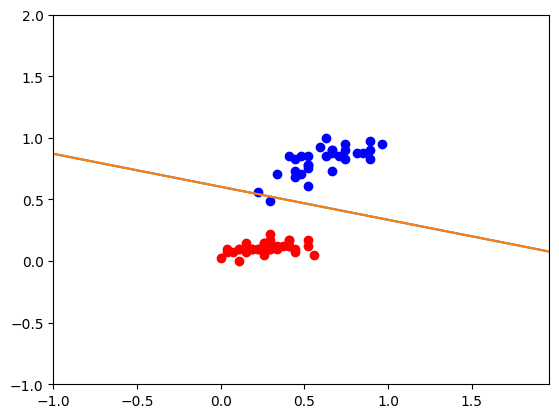

Bobot: [0.0, 0.7407407407407407, 2.1463414634146343]


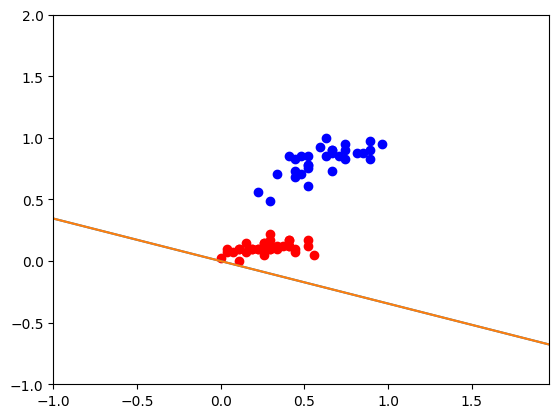

Bobot: [0.0, 0.7407407407407407, 2.1463414634146343]


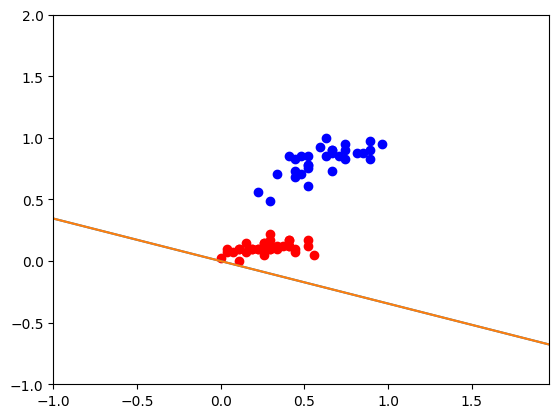

Bobot: [0.0, 0.7407407407407407, 2.1463414634146343]


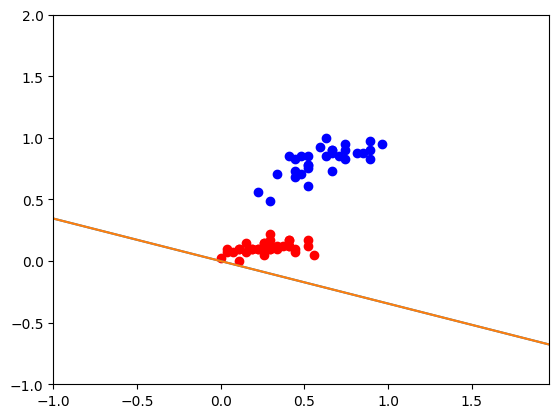

Bobot: [0.0, 0.7407407407407407, 2.1463414634146343]


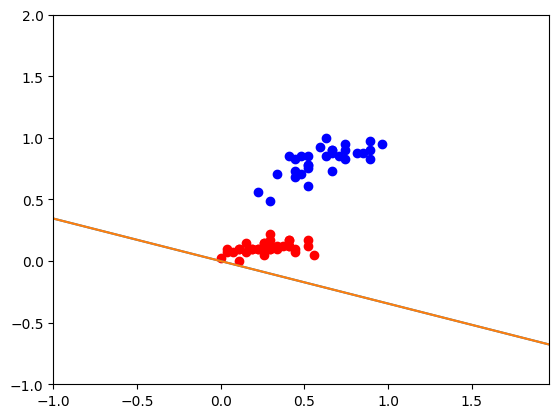

Bobot: [0.0, 0.7407407407407407, 2.1463414634146343]


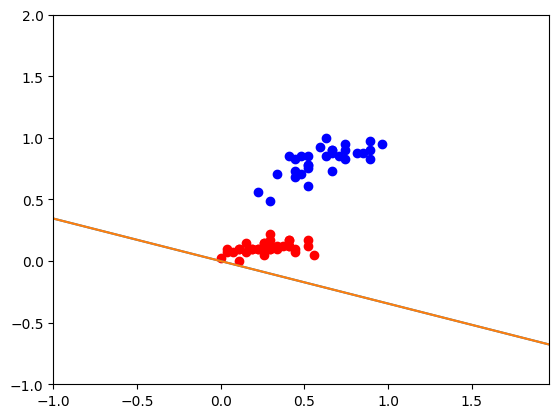

Bobot: [0.0, 0.7407407407407407, 2.1463414634146343]


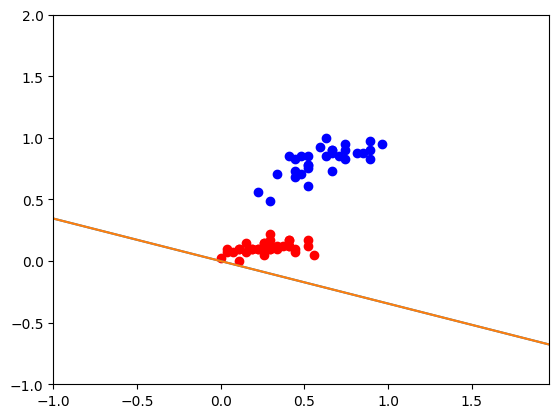

Bobot: [0.0, 0.7407407407407407, 2.1463414634146343]


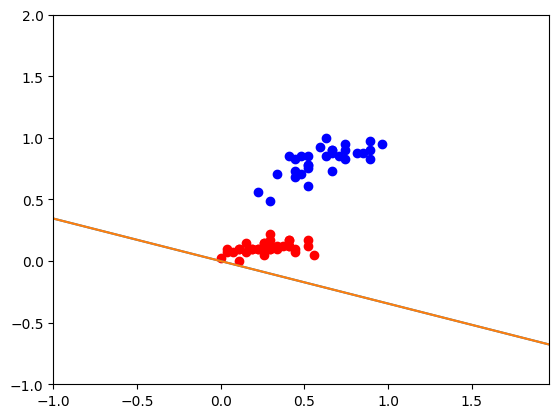

Bobot: [0.0, 0.7407407407407407, 2.1463414634146343]


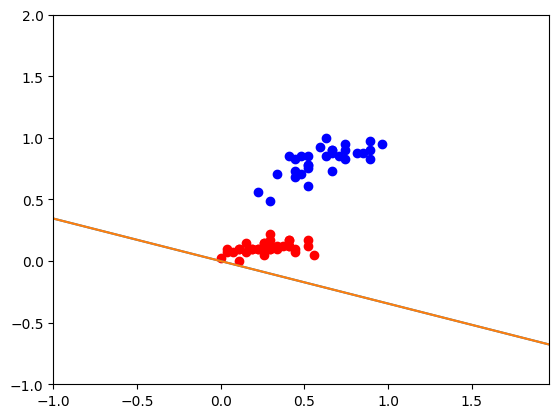

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


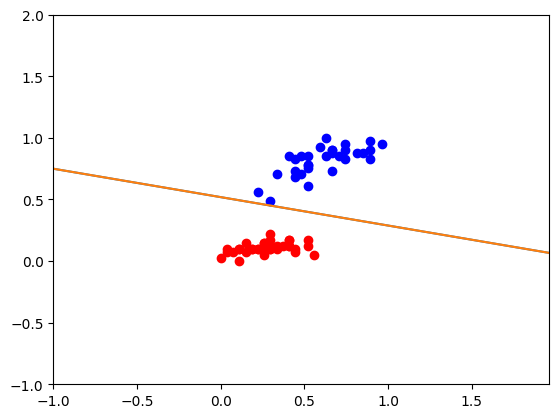

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


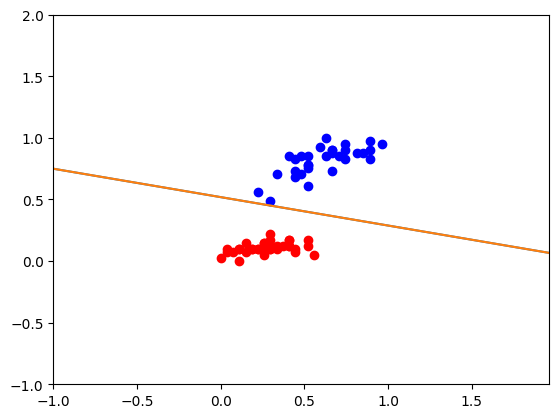

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


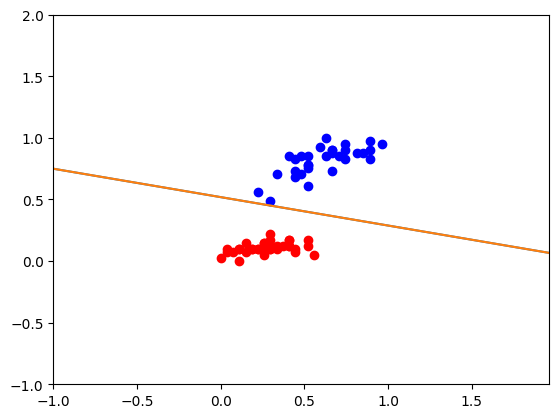

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


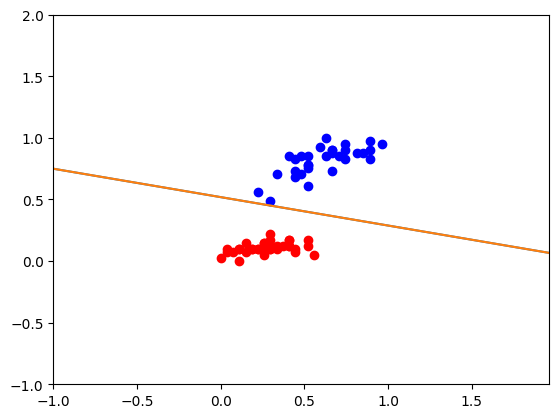

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


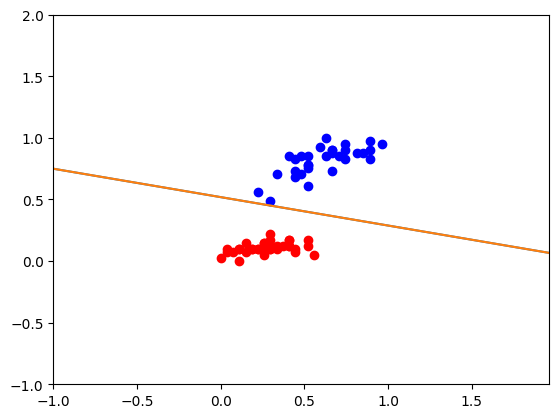

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


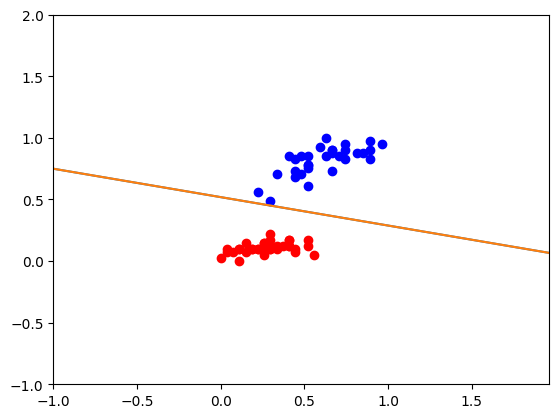

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


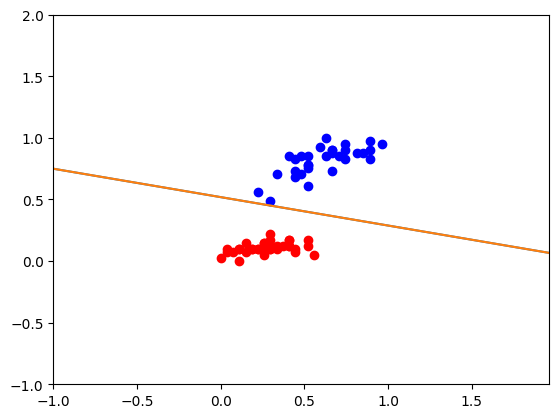

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


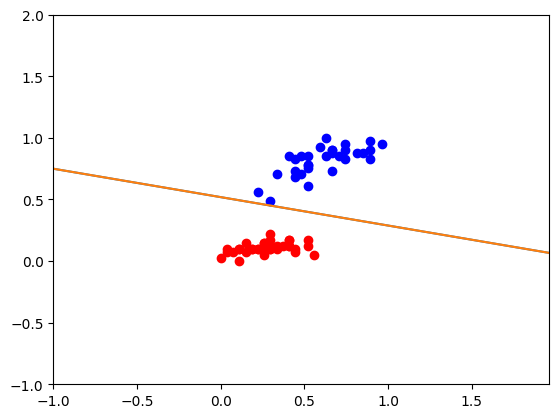

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


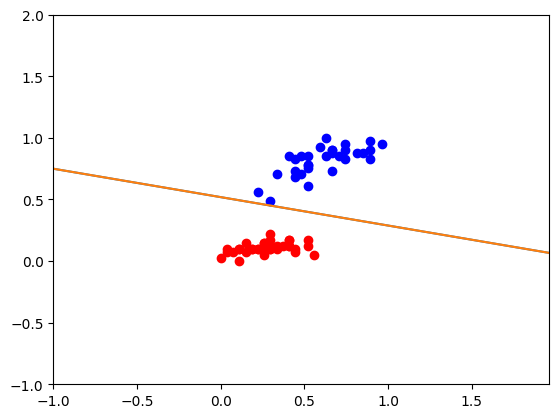

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


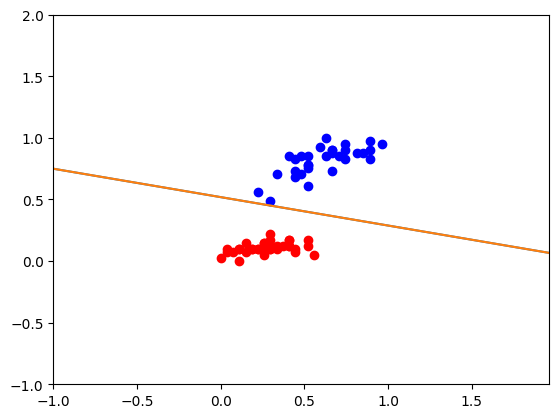

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


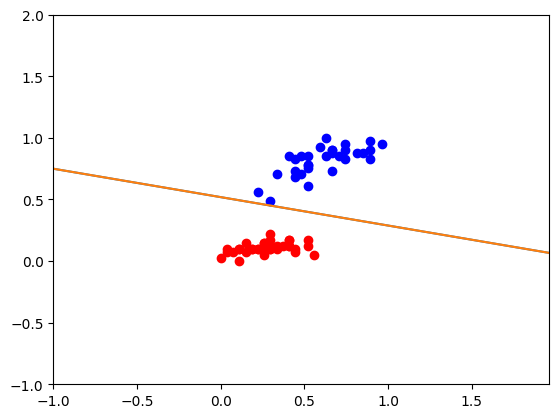

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


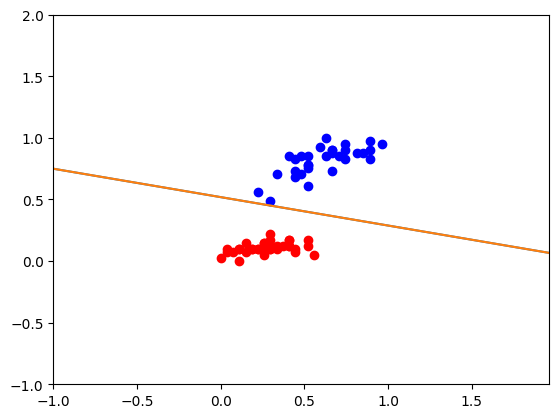

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


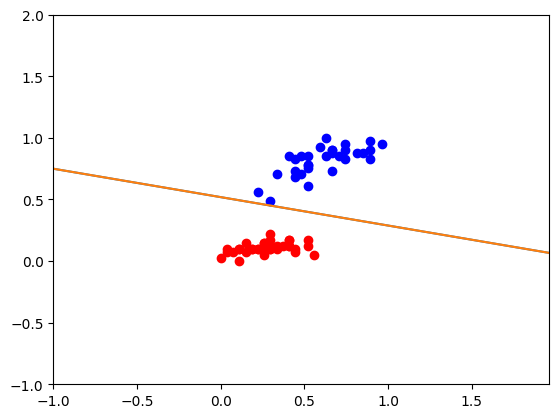

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


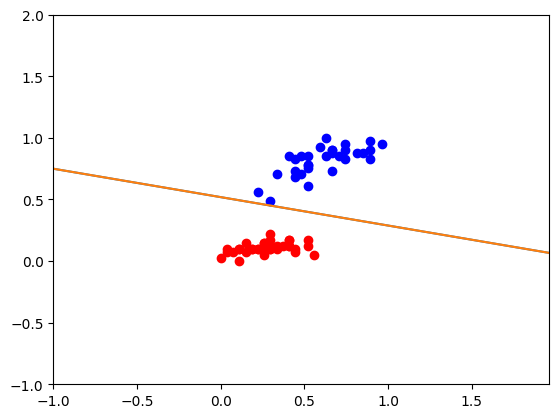

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


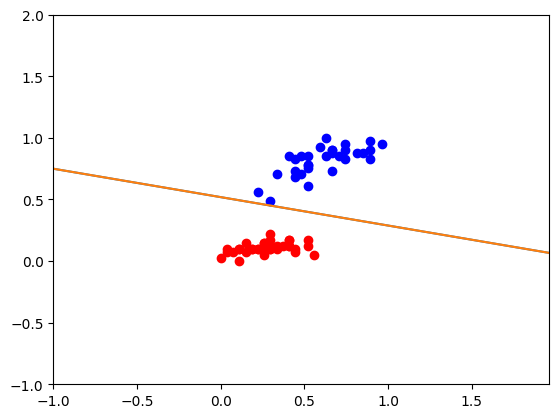

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


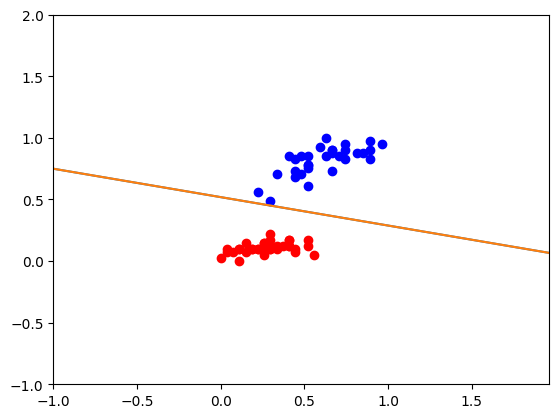

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


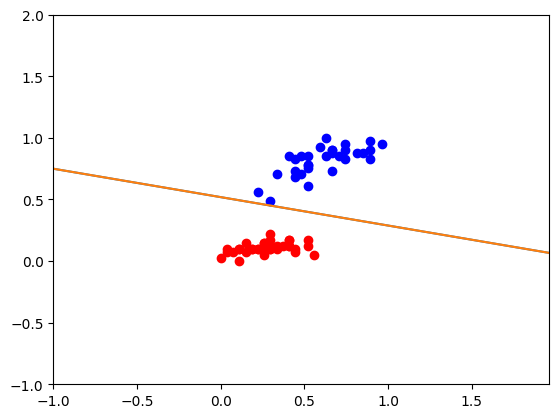

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


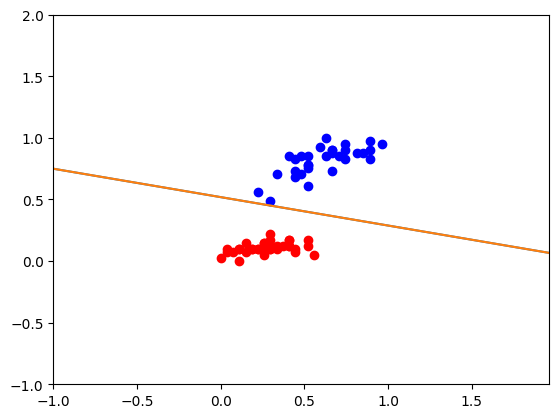

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


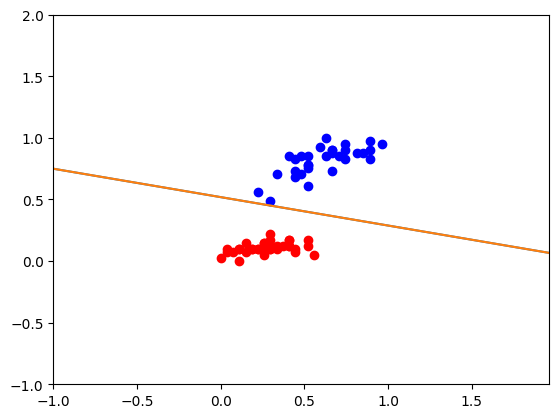

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


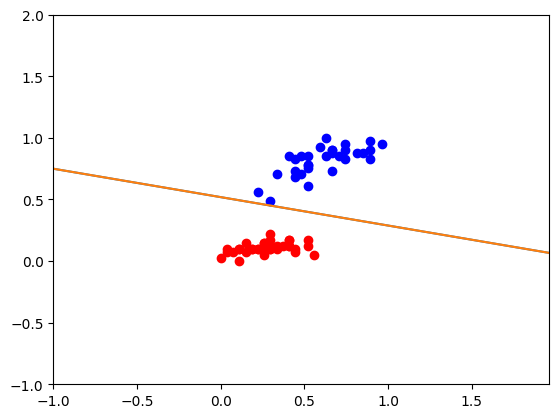

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


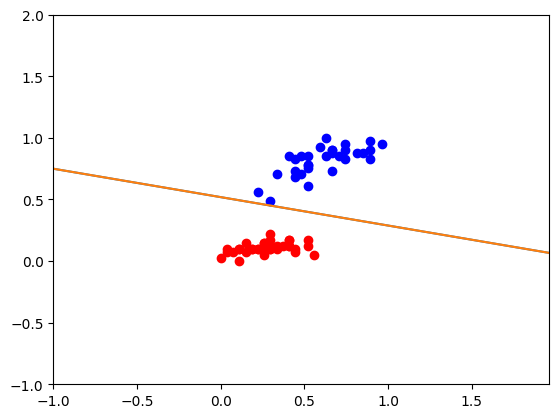

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


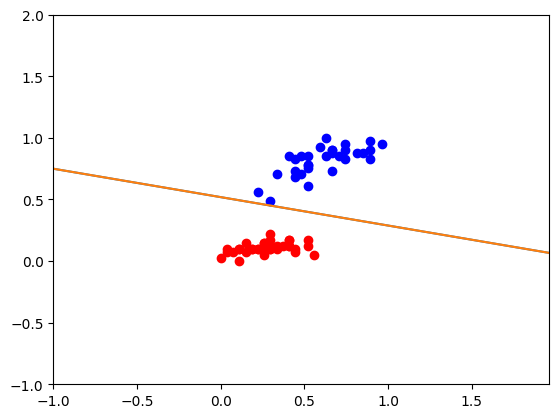

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


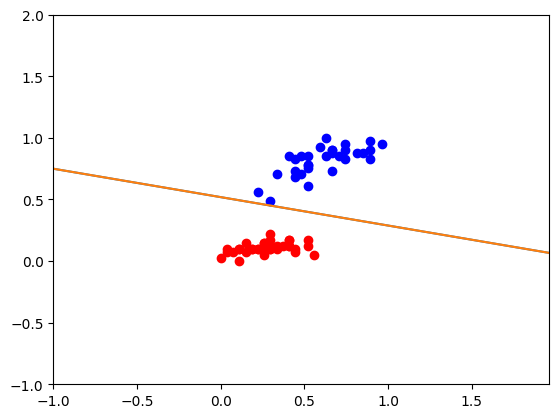

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


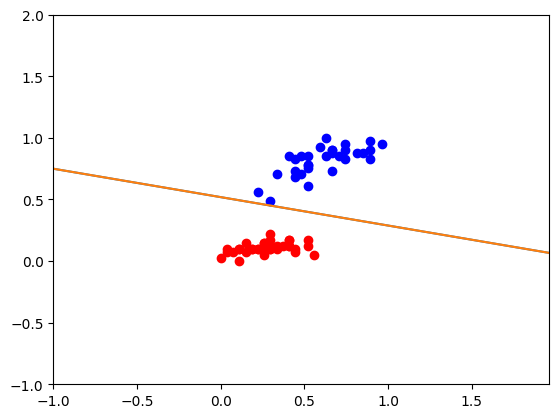

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


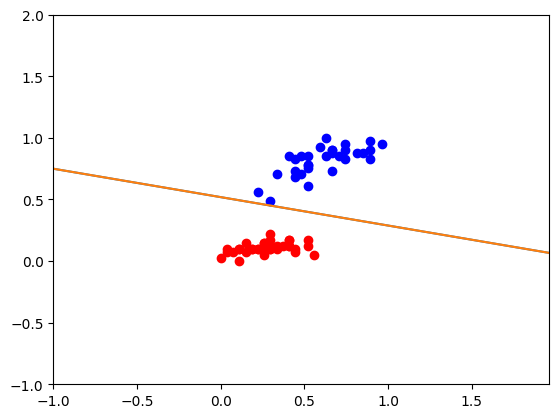

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


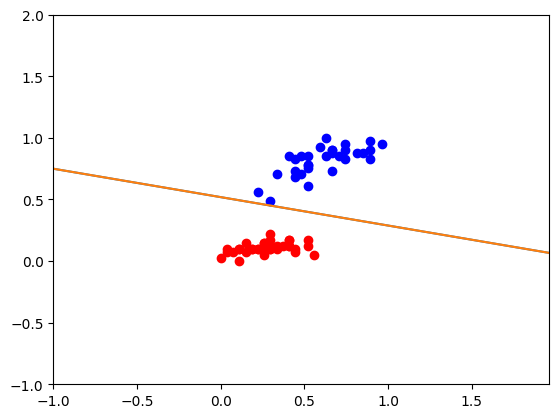

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


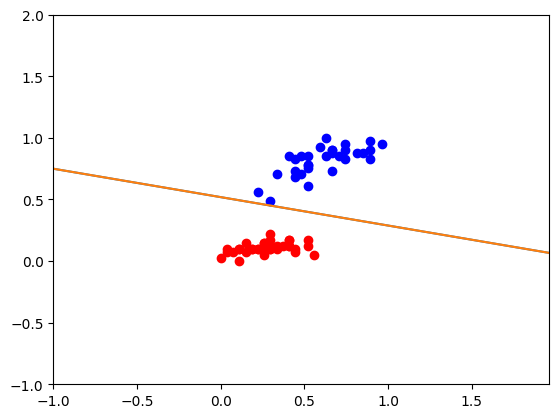

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


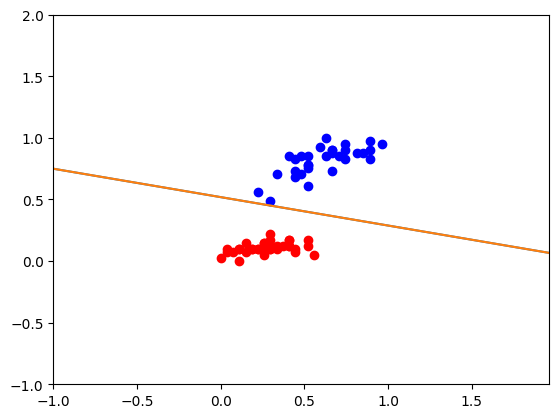

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


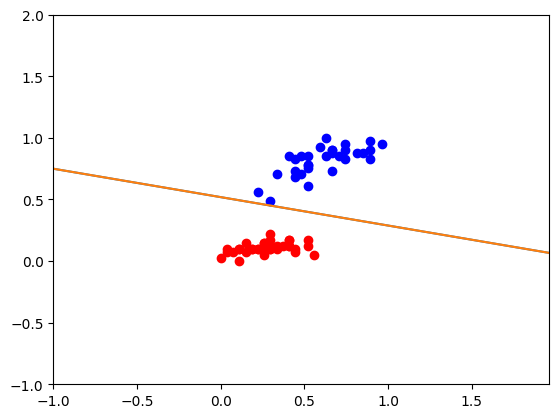

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


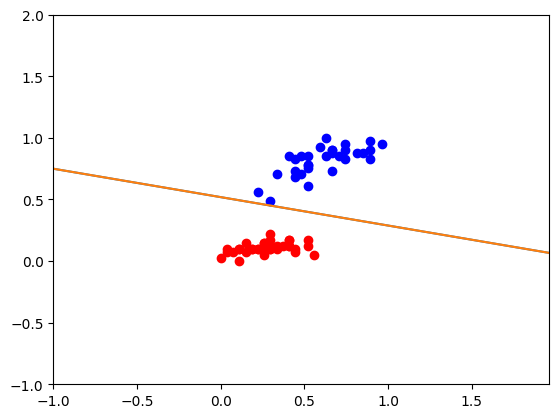

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


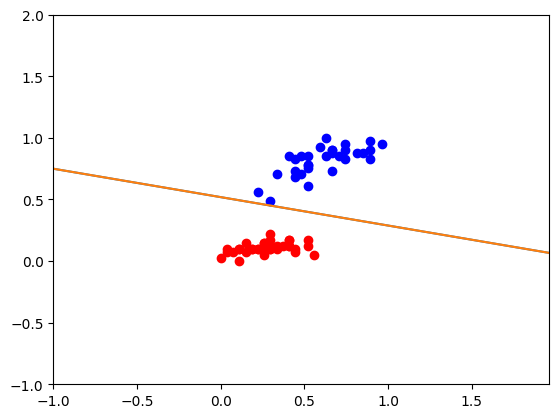

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


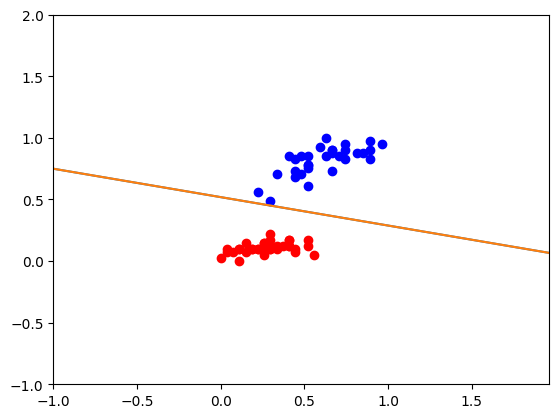

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


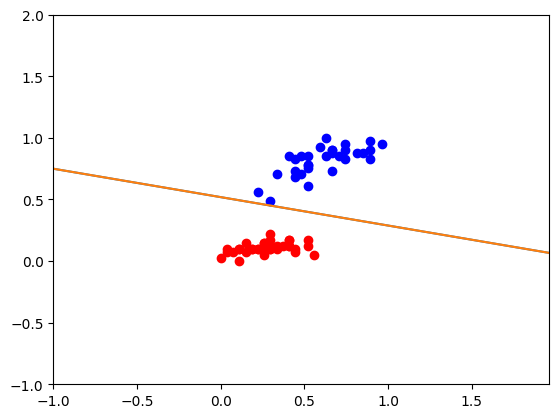

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


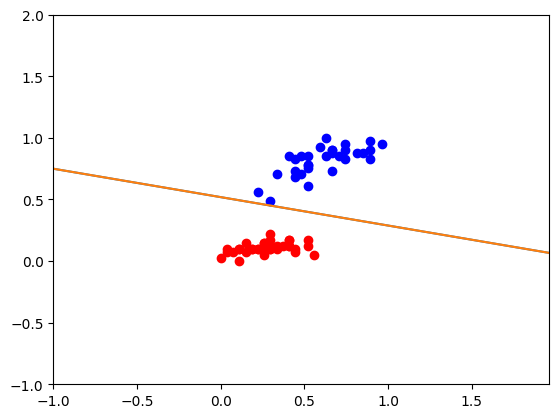


Epoch 3
Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


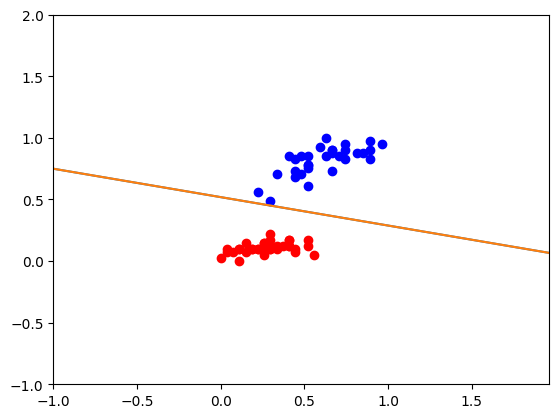

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


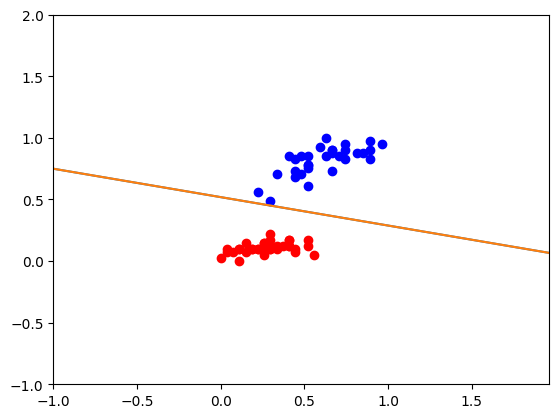

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


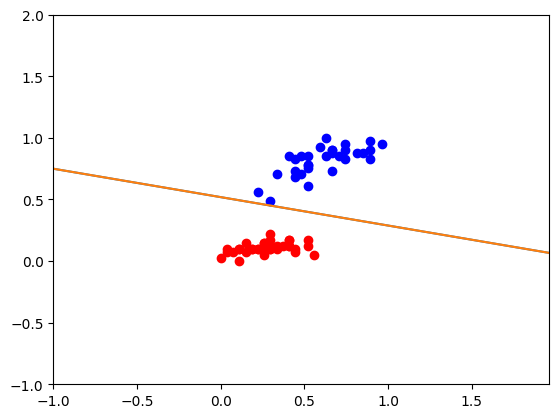

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


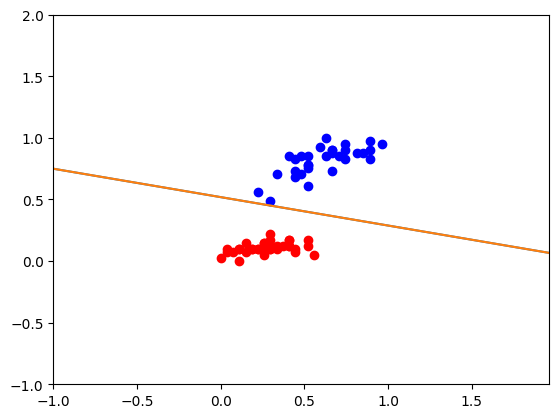

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


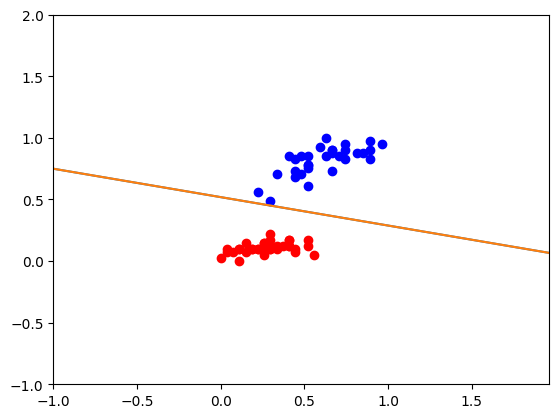

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


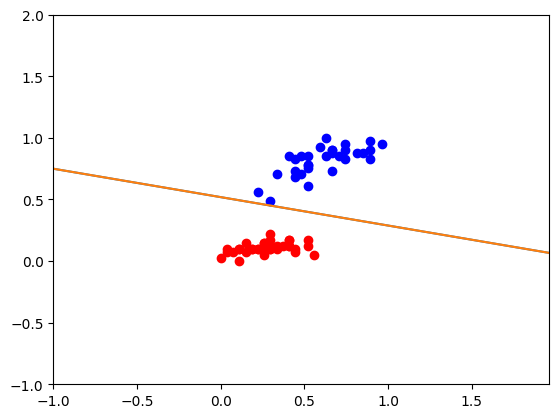

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


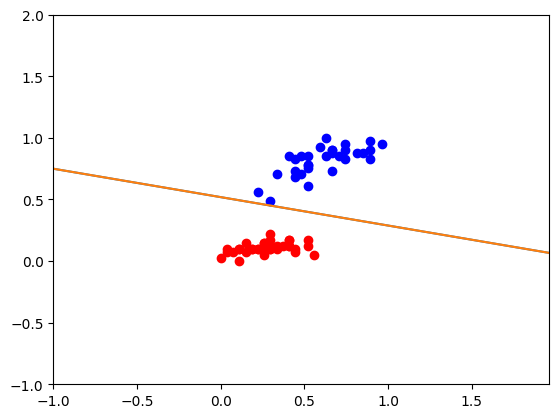

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


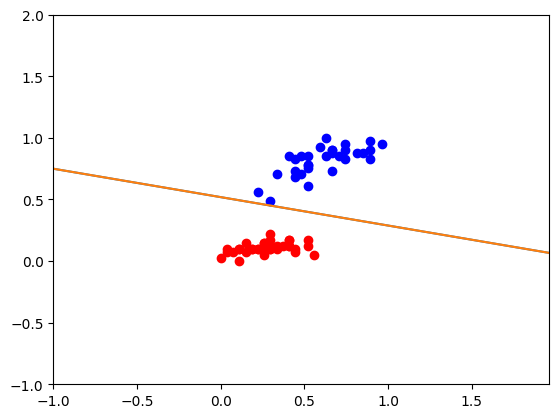

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


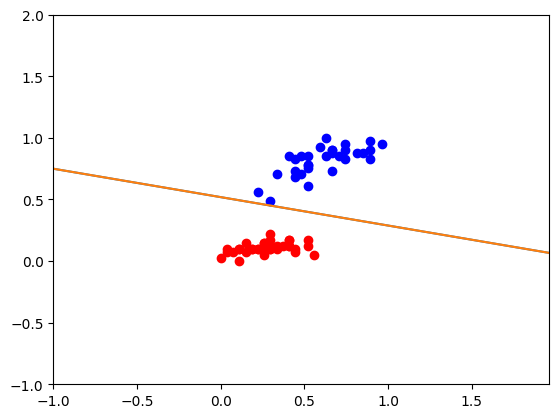

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


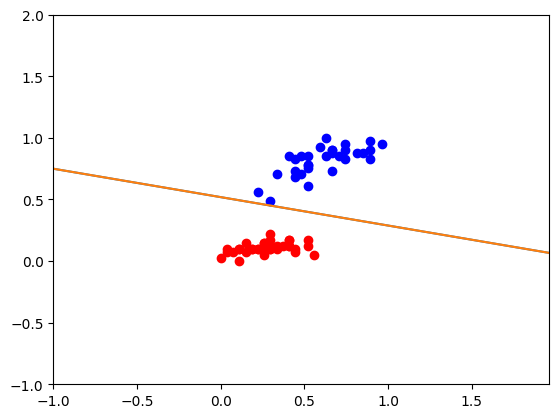

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


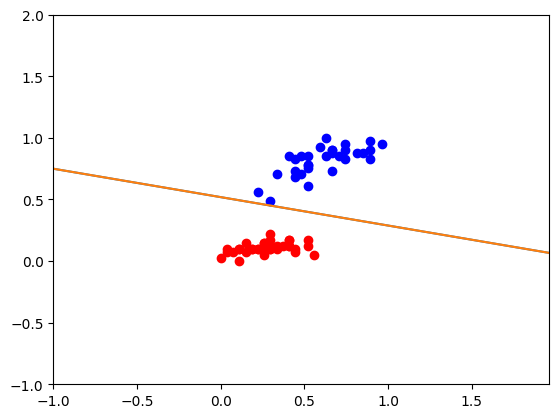

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


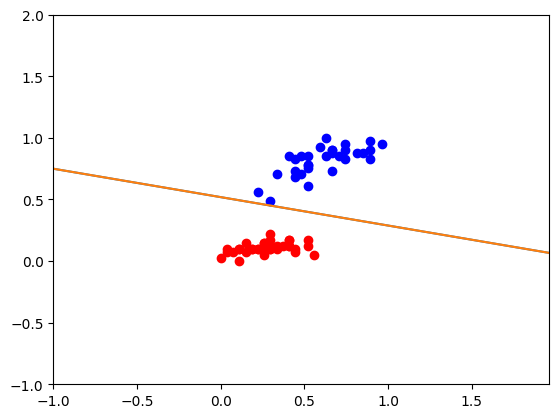

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


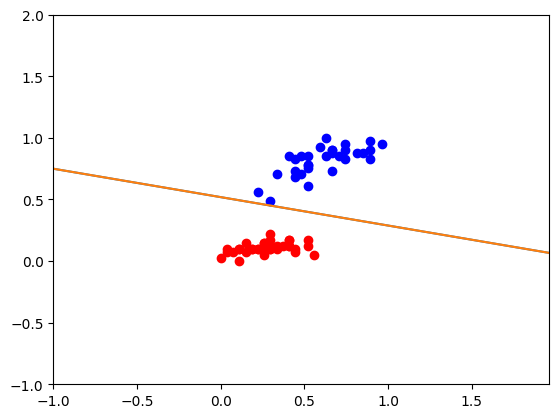

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


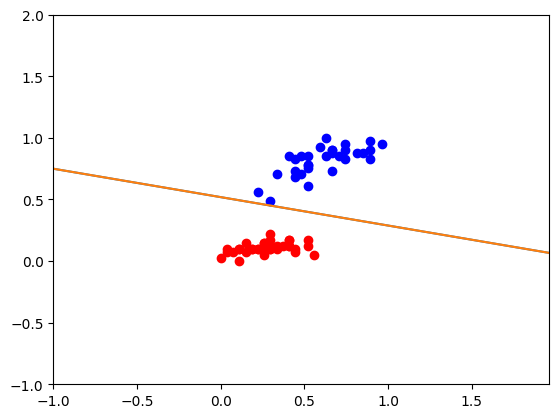

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


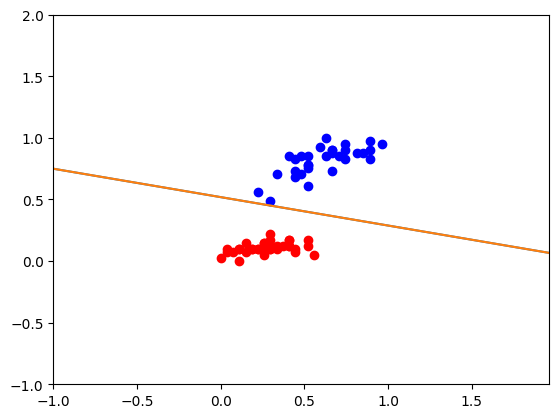

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


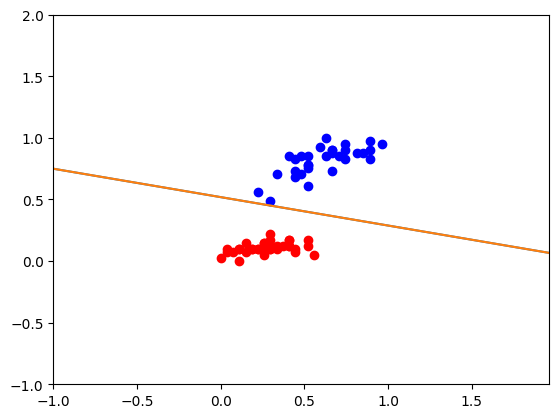

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


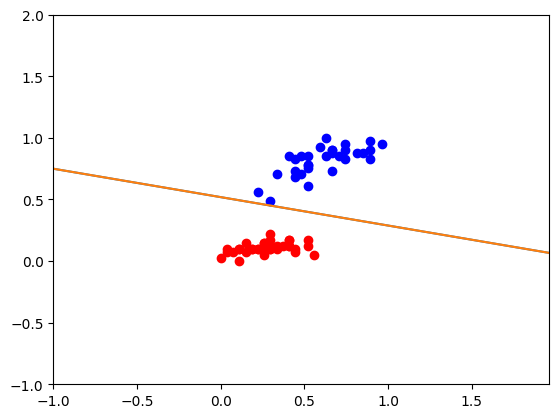

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


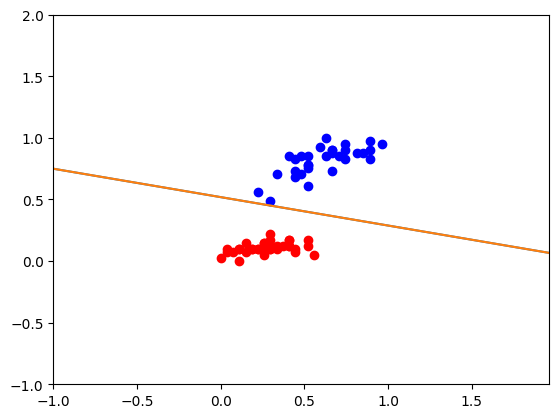

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


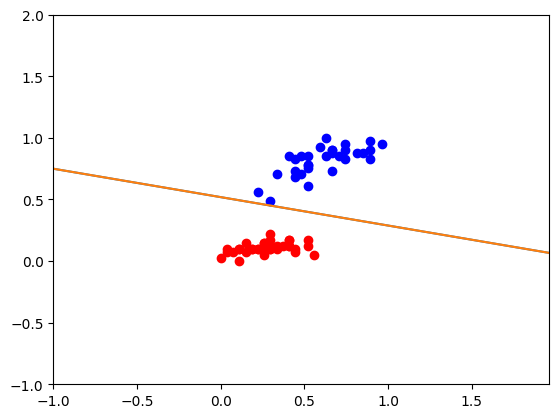

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


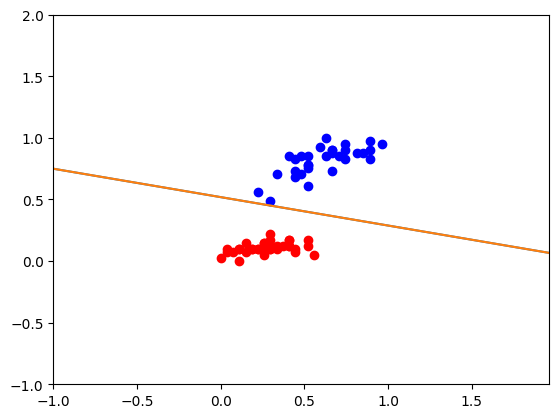

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


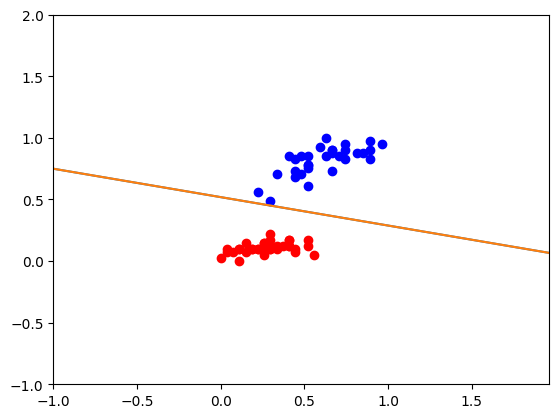

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


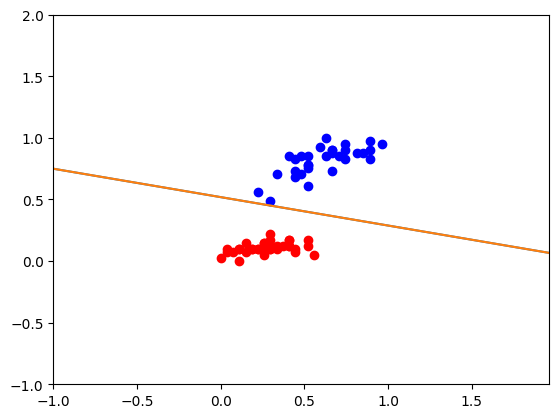

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


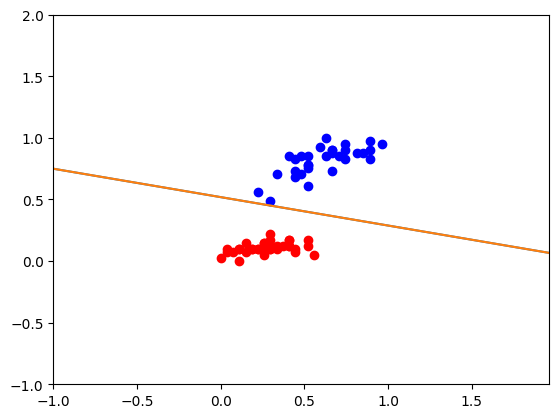

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


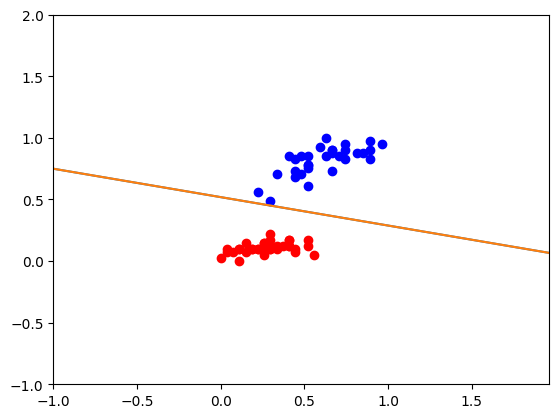

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


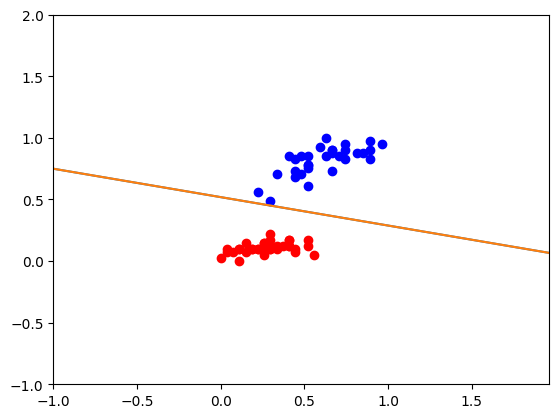

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


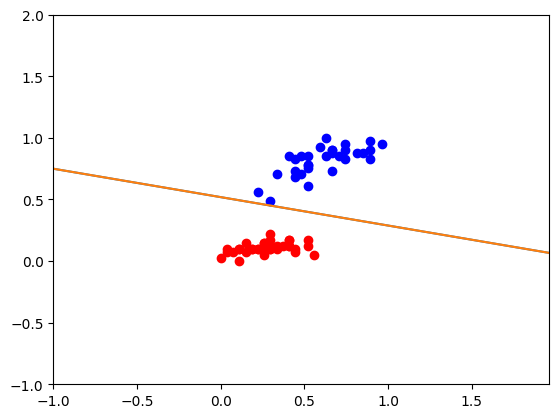

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


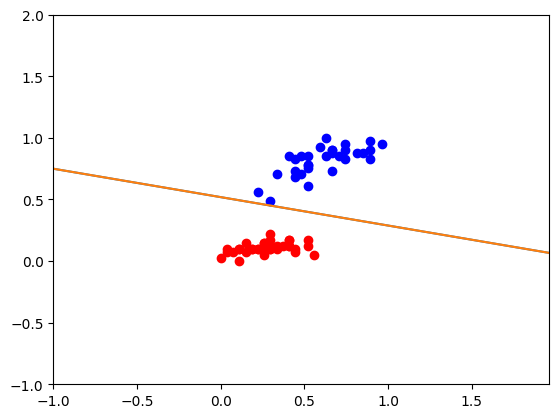

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


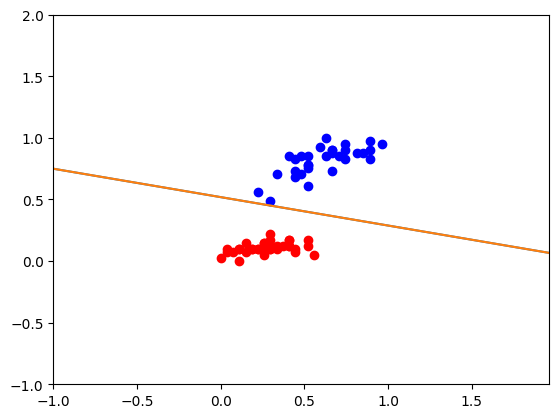

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


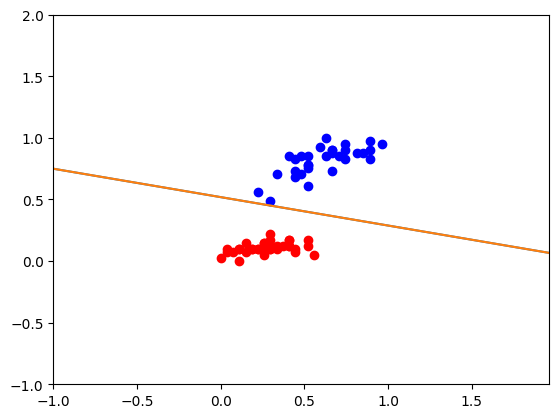

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


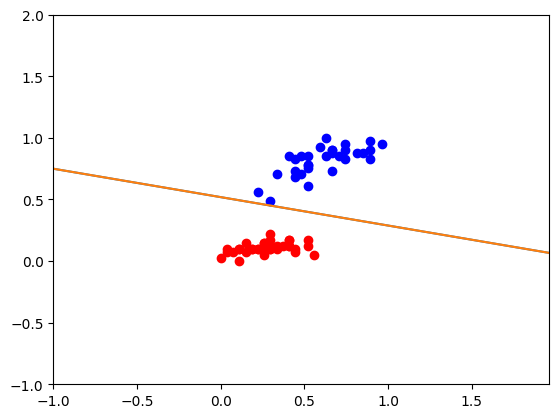

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


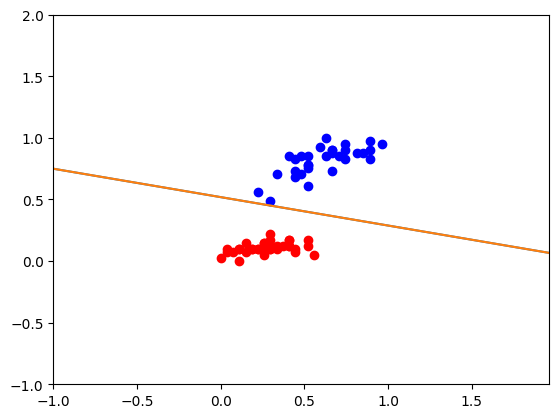

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


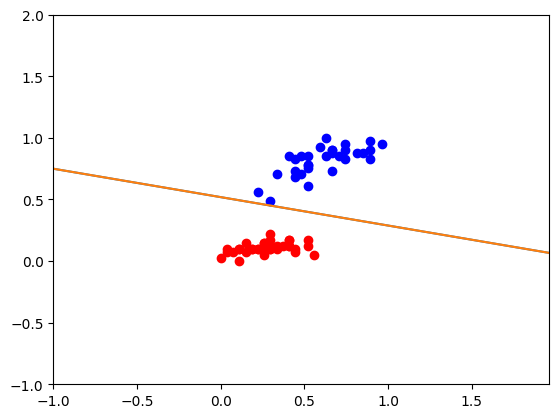

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


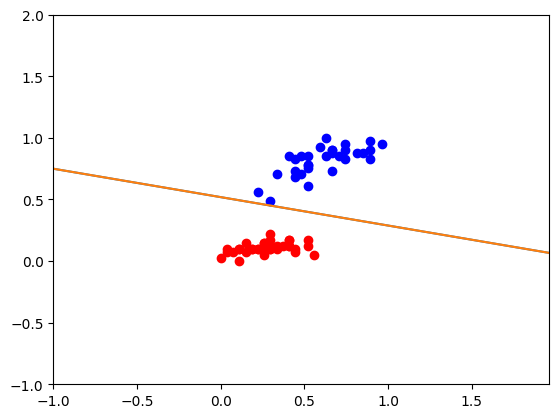

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


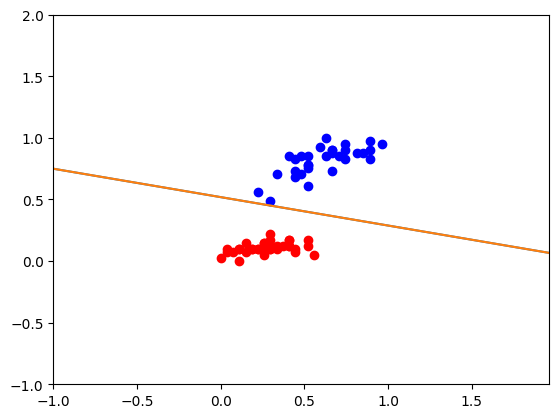

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


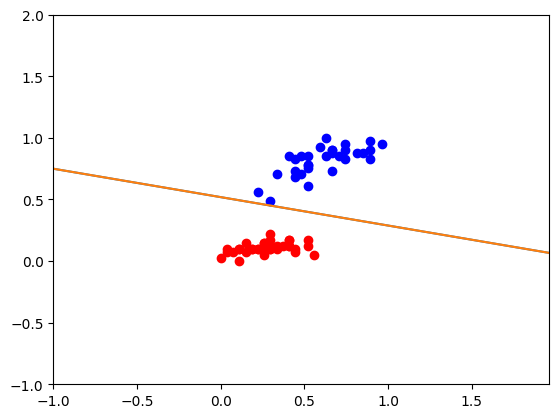

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


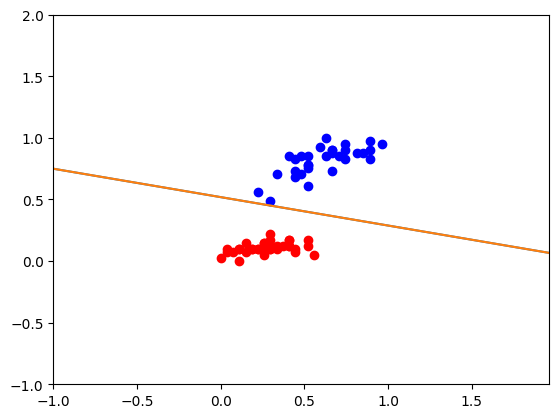

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


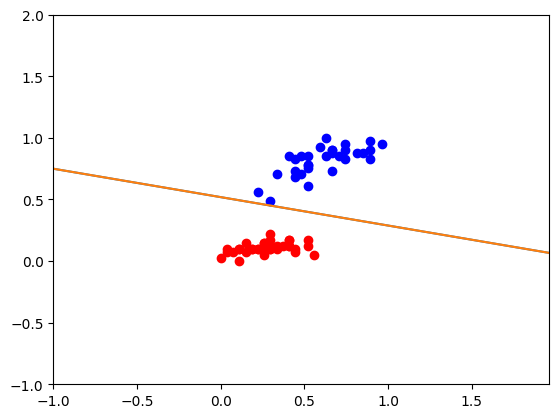

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


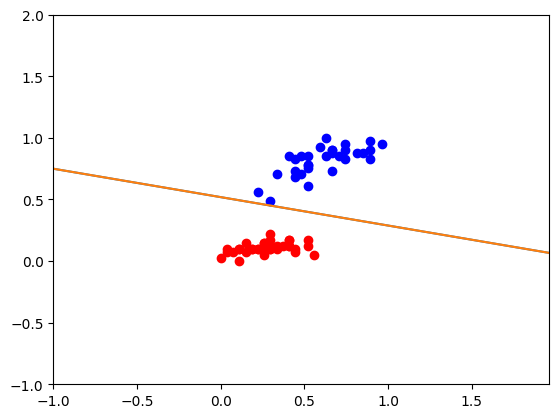

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


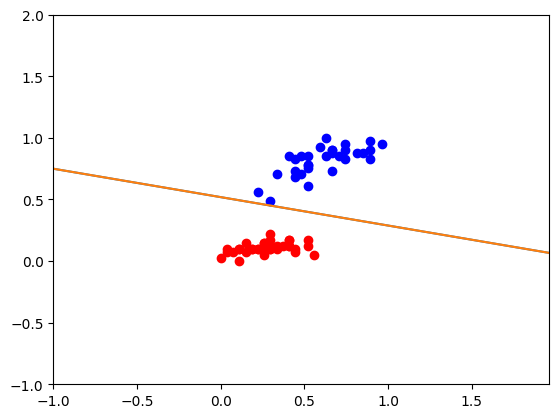

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


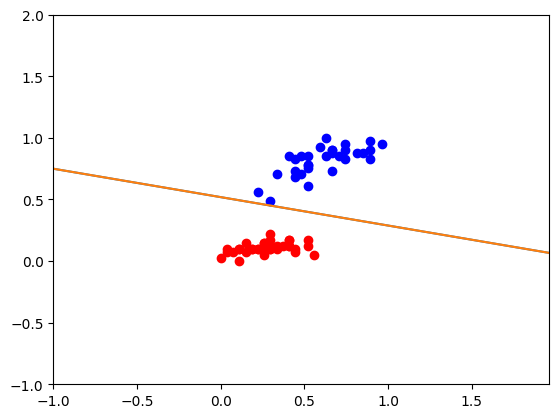

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


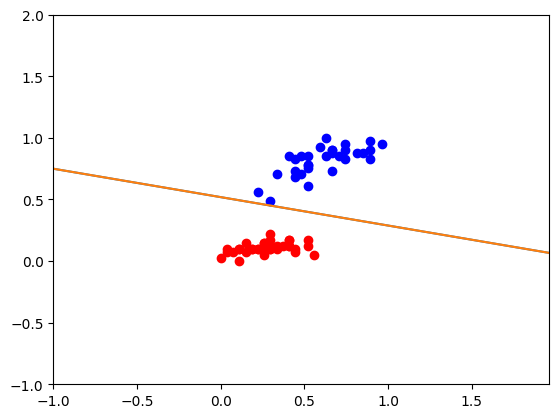

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


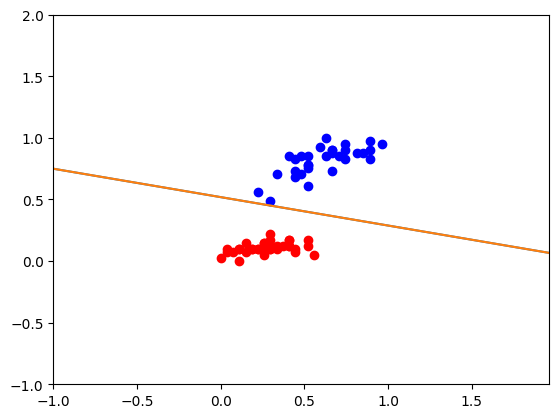

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


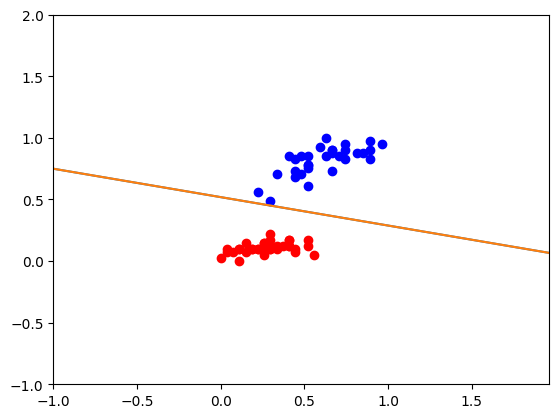

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


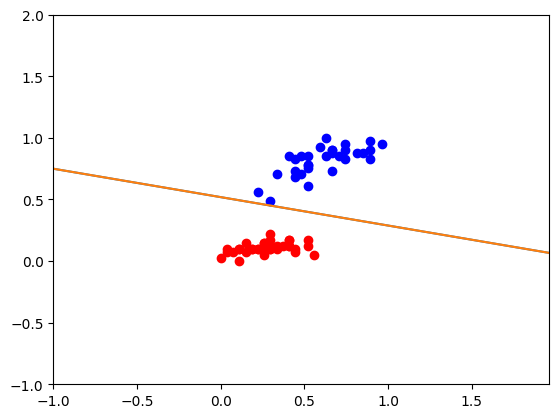

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


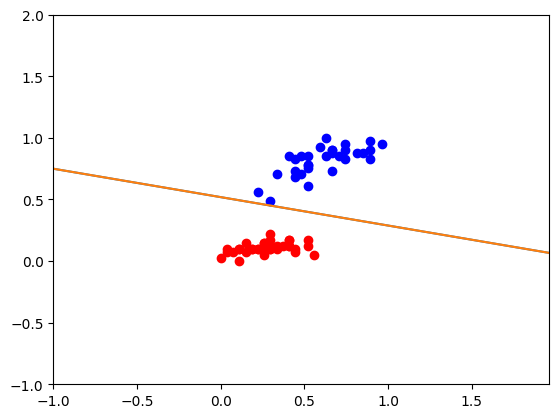

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


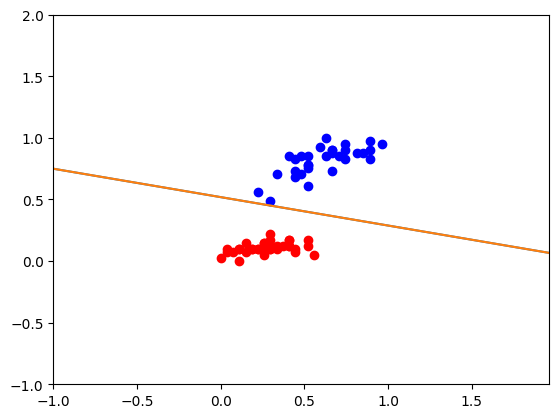

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


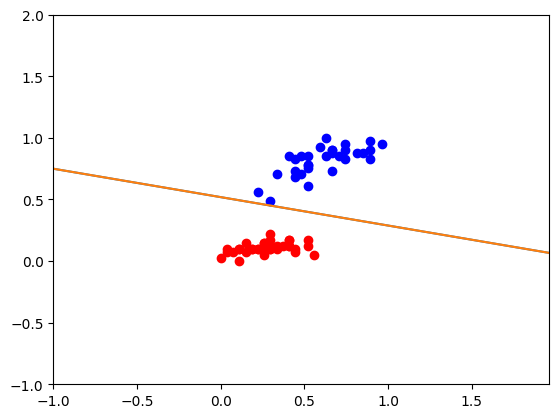

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


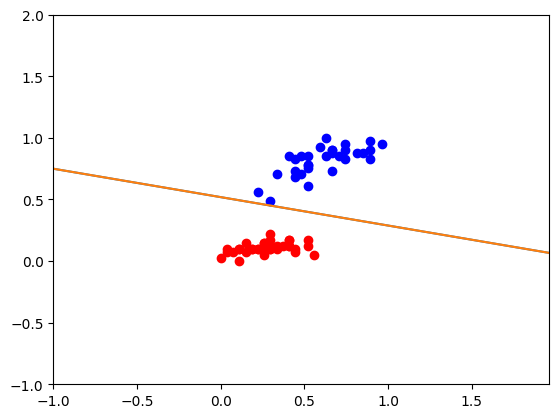

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


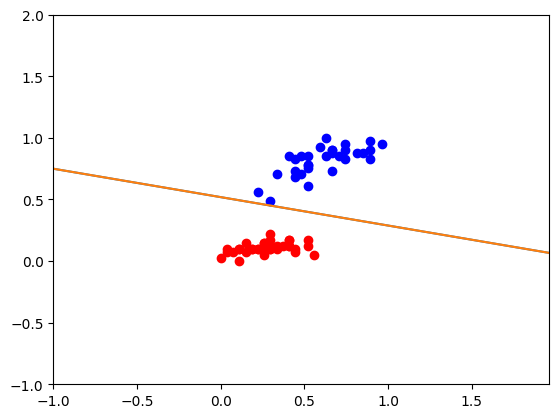

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


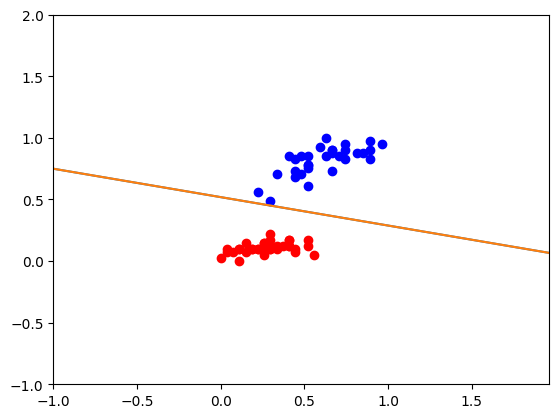

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


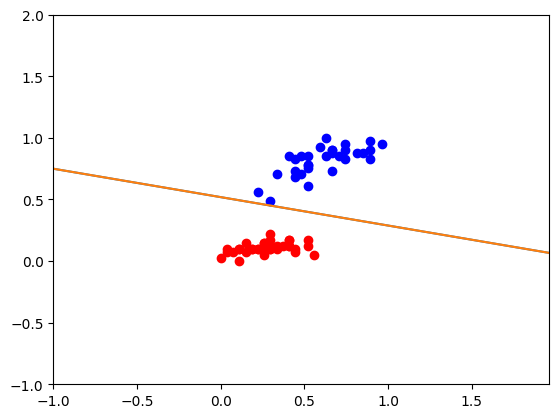

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


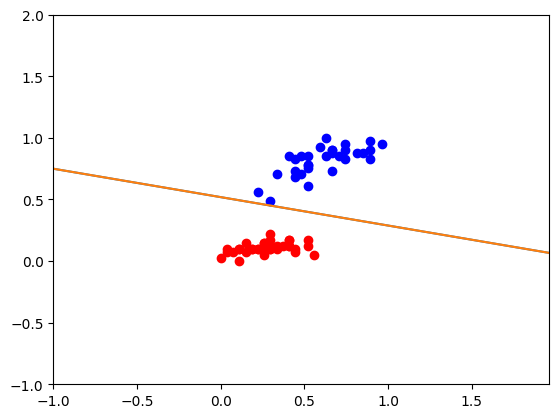

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


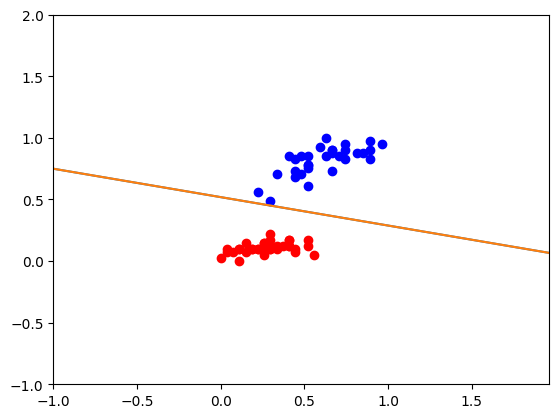

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


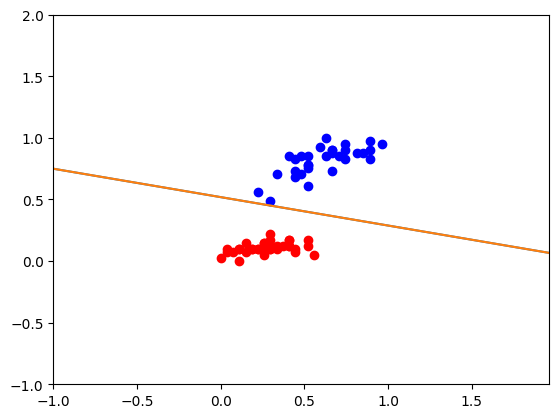

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


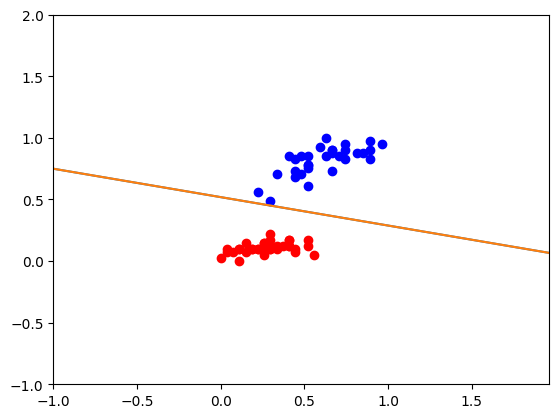

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


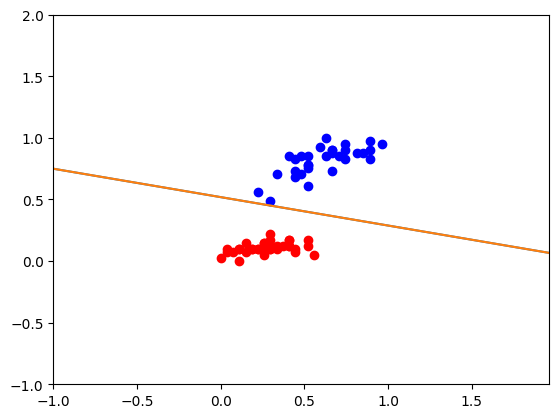

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


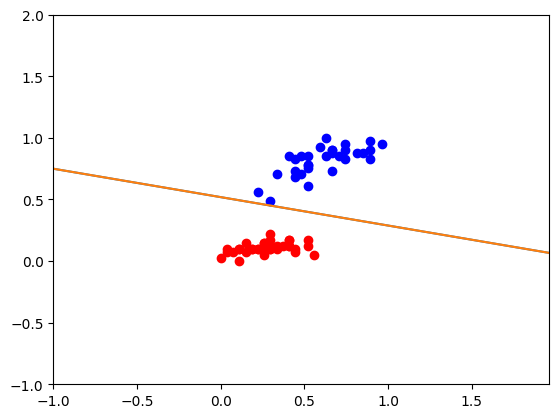

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


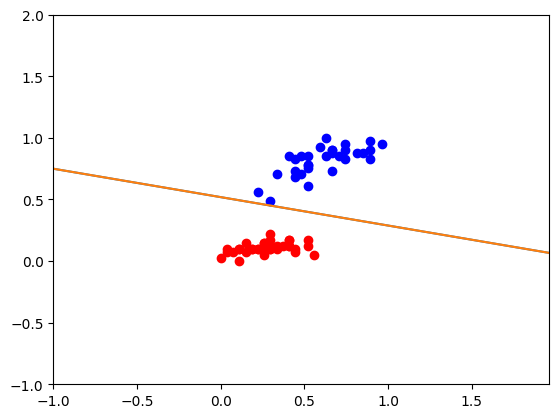

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


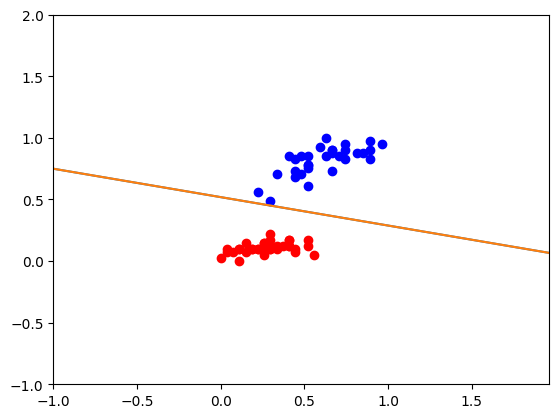

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


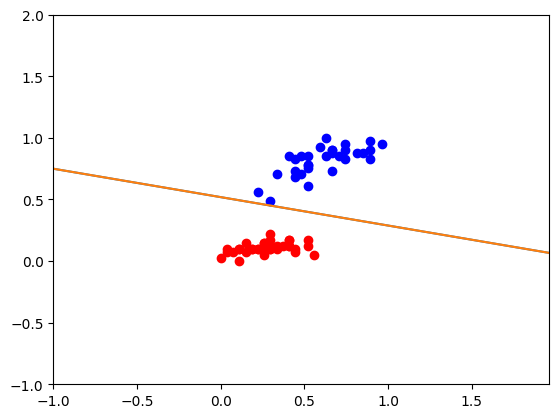

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


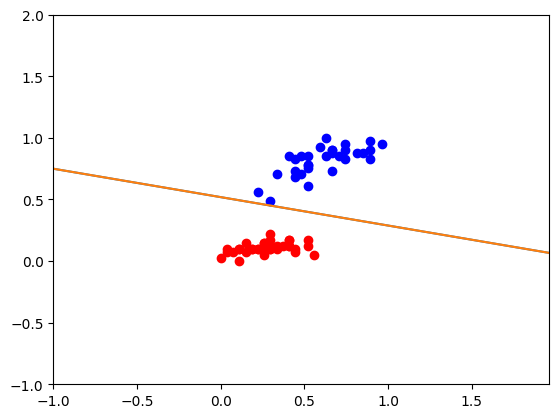

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


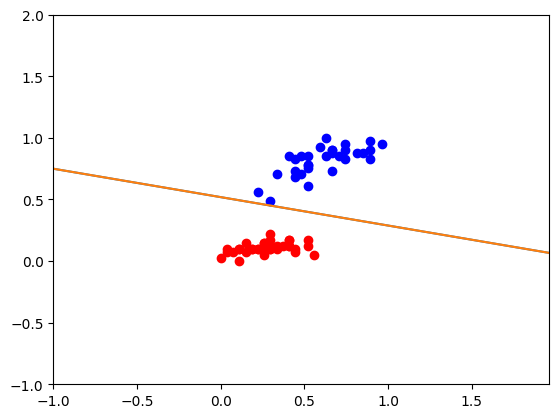

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


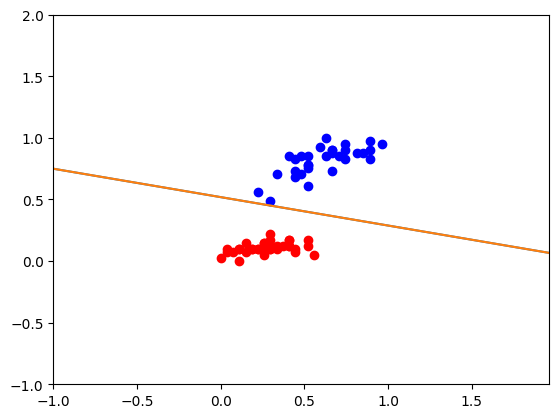

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


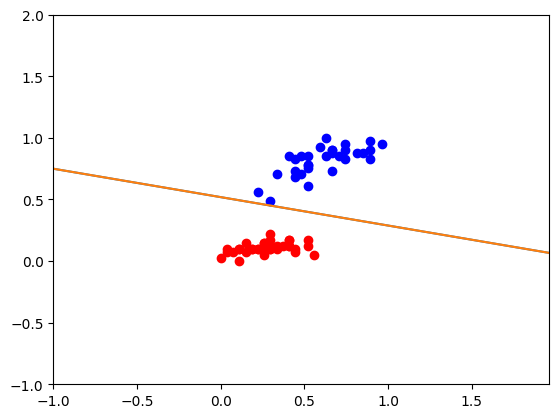

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


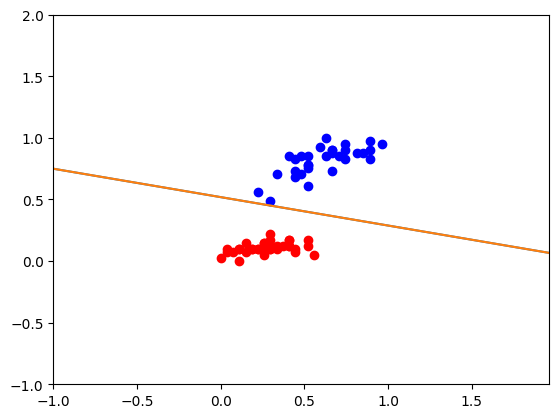

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


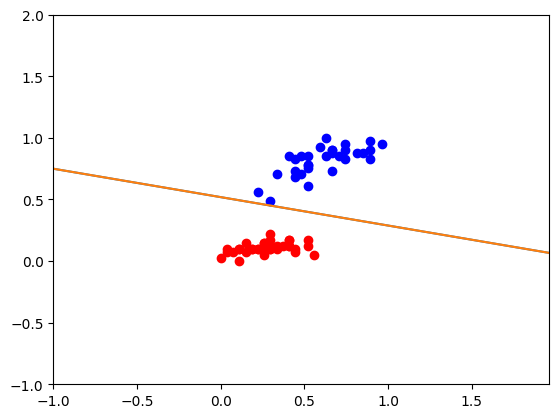

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


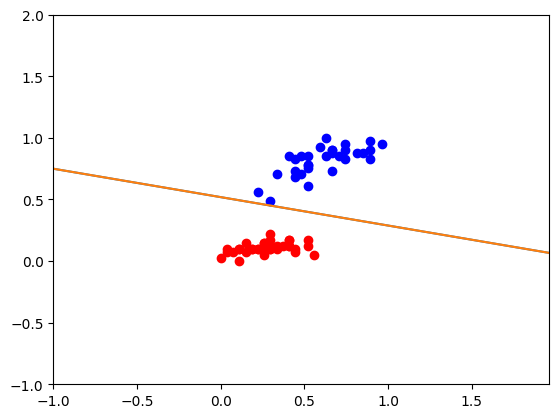

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


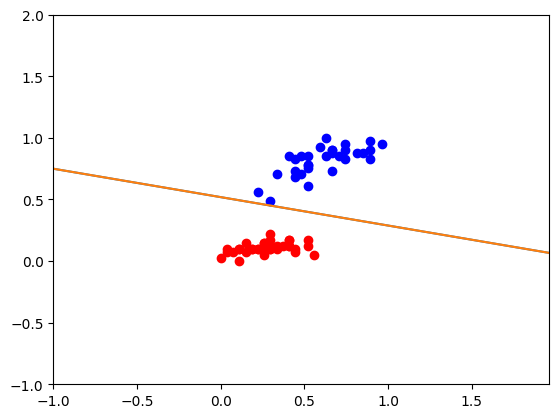

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


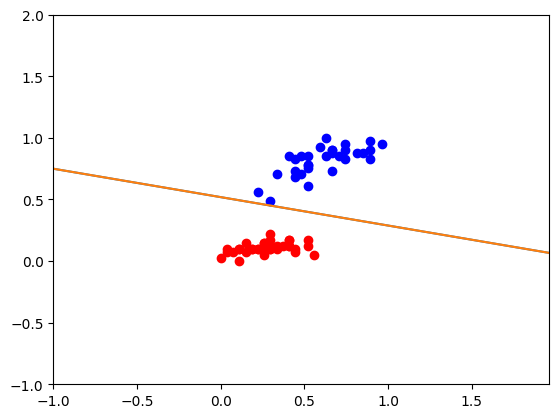

Bobot: [-1.0, 0.4444444444444444, 1.926829268292683]


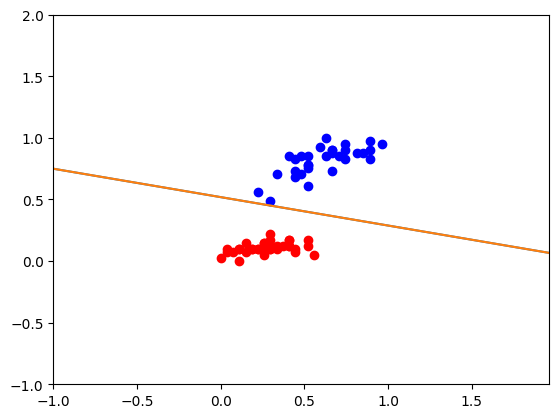

Epochs: 3
Accuracy: 1.0


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

X = iris[['sepal_length', 'petal_length']].to_numpy()
X = minmax_scale(X)

y = iris['species'].to_numpy()
c = {'setosa': -1, 'versicolor': 1}
y = [c[i] for i in y]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
w, epoch = percep_fit(X_train, y_train, verbose=True, draw=True)
out = percep_predict(X_test, w)
accuracy = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy)